In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [74]:
df = pd.read_csv(r"/content/sample_data/EXAM/application_data.csv")
df1 = pd.read_csv(r"/content/sample_data/EXAM/previous_application.csv")


In [75]:
#number of rows and column in datatype
df.shape

(307511, 122)

In [64]:
#Checking the types of data

#Here we check for the datatypes because sometimes number would be stored as a string, In that case, we have to convert that string to the integer data only then we can plot the data via a graph.
#Here, in this case, the data is already in integer format so nothing to worry.
#info() gives us a shorter summary of our dataset. It returns us information about the data type, non-null values and memory usage.

print(df1.info(verbose = True))
print(df.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [78]:
#Handlnig Null values

#There are 49 columns who has more than 45% null values. So we removed these columns.

null_percentage = df.isnull().sum() / len(df) * 100
null_col = null_percentage[null_percentage > 45].index
print(null_col)
df_cleaned = df.drop(columns=null_col)
df_cleaned.info(verbose = True)


Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [8]:
# Fill null values for numeric columns with median
for col in df_cleaned.select_dtypes(include=['number']).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Fill null values for object columns proportionally
for col in df_cleaned.select_dtypes(include=['object']).columns:
    value_counts = df_cleaned[col].value_counts(normalize=True)  # Get proportions of each value
    missing_indices = df_cleaned[col][df_cleaned[col].isnull()].index  # Get indices of missing values
    fill_values = np.random.choice(value_counts.index, size=len(missing_indices), p=value_counts.values)  # Sample based on proportions
    df_cleaned.loc[missing_indices, col] = fill_values  # Fill missing values



<ipython-input-8-4ae2aae054b0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [9]:
# Hnadling duplecate rows
duplicate_rows_df = df_cleaned[df_cleaned.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

#This data does not have any duplicate values

number of duplicate rows:  (0, 73)


In [11]:
#Days contain negative values, which are not valid. So, we changed those values to positive values by taking abolute values.
df_cleaned[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=df_cleaned[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].abs()

df_cleaned[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=df_cleaned[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]//365.25
# rename column from days to years
df_cleaned.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

df_cleaned.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
# turn XNA to F
df_cleaned.loc[df_cleaned["CODE_GENDER"] == "XNA",'CODE_GENDER'] = "F"

In [82]:
df_cleaned[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

# Here we observed that wherever there is a pensioner in NAME_INCOME_TYPE column, there is null value in organization_type column.

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

In [13]:
#Replacing XNA to pensioner in ORGANIZATION_TYPE column.
df_cleaned["ORGANIZATION_TYPE"].replace("XNA" ,"pensioner" ,inplace=True)

#Some columns like FLAG_OWN_CAR and FLAG_OWN_REALTY contain Y/N type of values, let’s make it 1/0 for ease of understanding.
df_cleaned['FLAG_OWN_CAR'] = df_cleaned['FLAG_OWN_CAR'].map({'Y':1 , 'N': 0})
df_cleaned['FLAG_OWN_REALTY'] = df_cleaned['FLAG_OWN_REALTY'].map({'Y':1 , 'N': 0})


<ipython-input-13-81a792c59597>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["ORGANIZATION_TYPE"].replace("XNA" ,"pensioner" ,inplace=True)


In [15]:
df_cleaned.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
#After observing all the columns, we found that some didn’t add any value to our analysis, so we simply dropped them so that the data looked clear.

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_cleaned = df_cleaned.drop(labels=unwanted,axis=1,inplace=True)

KeyError: "['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'] not found in axis"

In [17]:
# Outlier Analysis

#checking total number of numerical columns after removing unwanted columns
numerical_col = df_cleaned.select_dtypes(include='number').columns
len(numerical_col)

35

<ipython-input-20-7330e78a99d4>:4: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


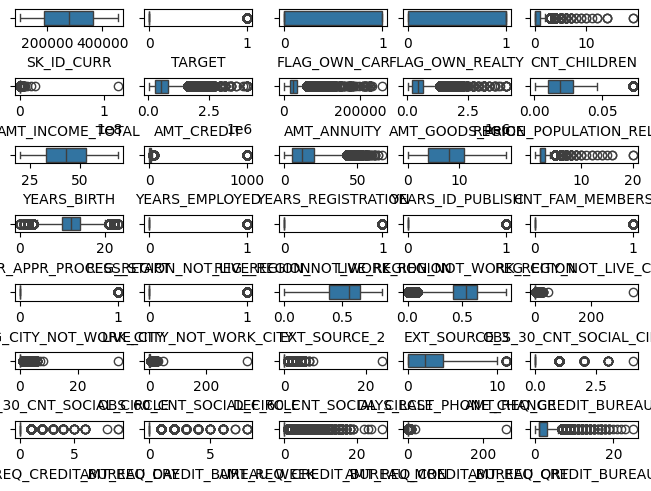

In [20]:
# Boxpots distribtion for each numerical column using for loop for understanding outliers in data

fig, axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 # Plot Configuration
fig.subplots_adjust(left=0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)

for ax, column in zip(axes.flatten(), numerical_col):        # Using For loop
    sns.boxplot(x=df_cleaned[column], ax=ax)  # Plotting

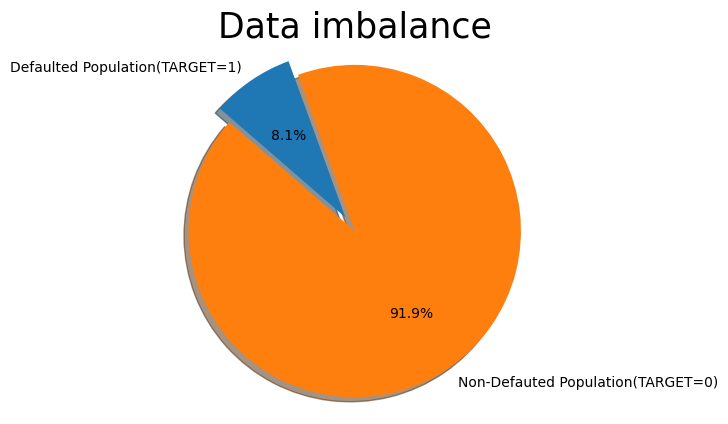

In [21]:
#Checking data imbalance
# distribution of the target variable in pie chart
count1 = 0
count0 = 0
for i in df_cleaned['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df_cleaned['TARGET']))*100
count0 = (count0/len(df_cleaned['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

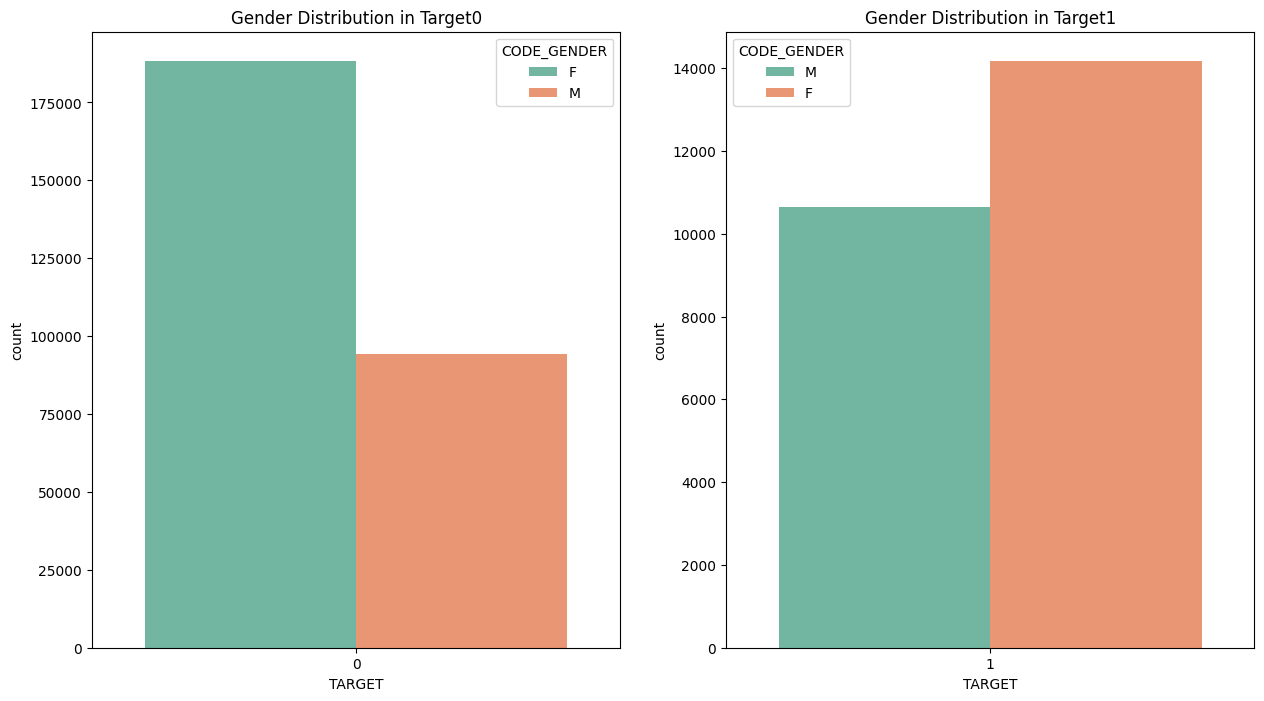

In [23]:
#Gender distribution based on Target 0 and Target 1

Target0 = df_cleaned[df_cleaned['TARGET'] == 0]
Target1 = df_cleaned[df_cleaned['TARGET'] == 1]
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

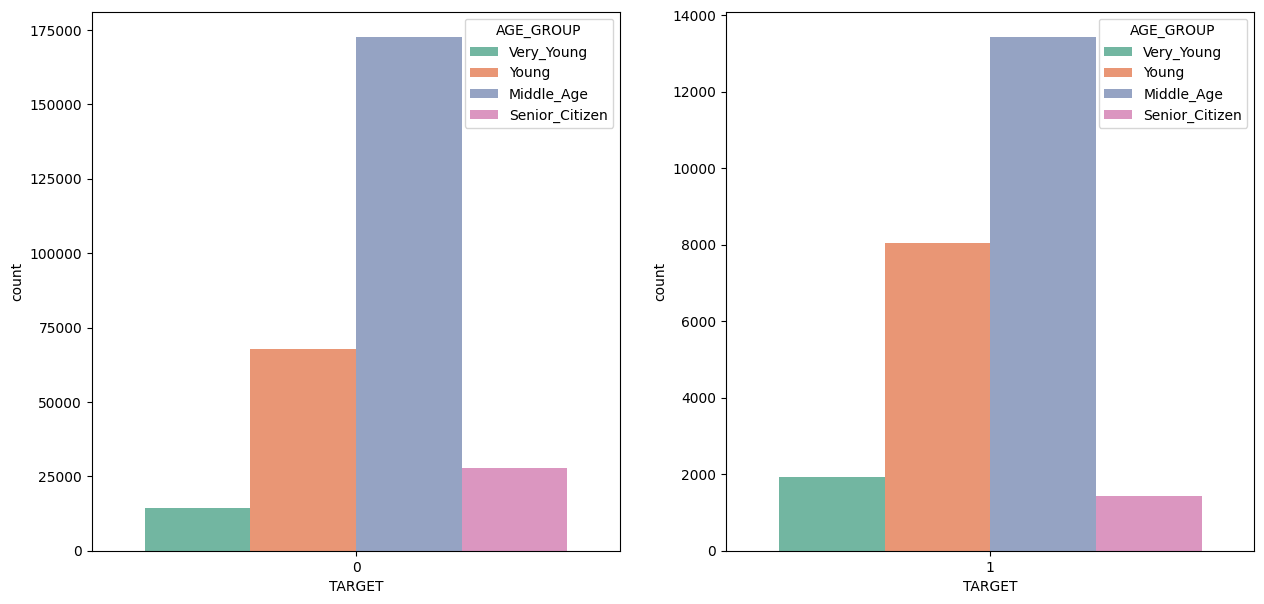

In [29]:
#Age distribution based on Target 0 and Target 1

df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['YEARS_BIRTH'],
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

Target0 = df_cleaned[df_cleaned['TARGET'] == 0]
Target1 = df_cleaned[df_cleaned['TARGET'] == 1]

plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

<Figure size 4000x500 with 0 Axes>

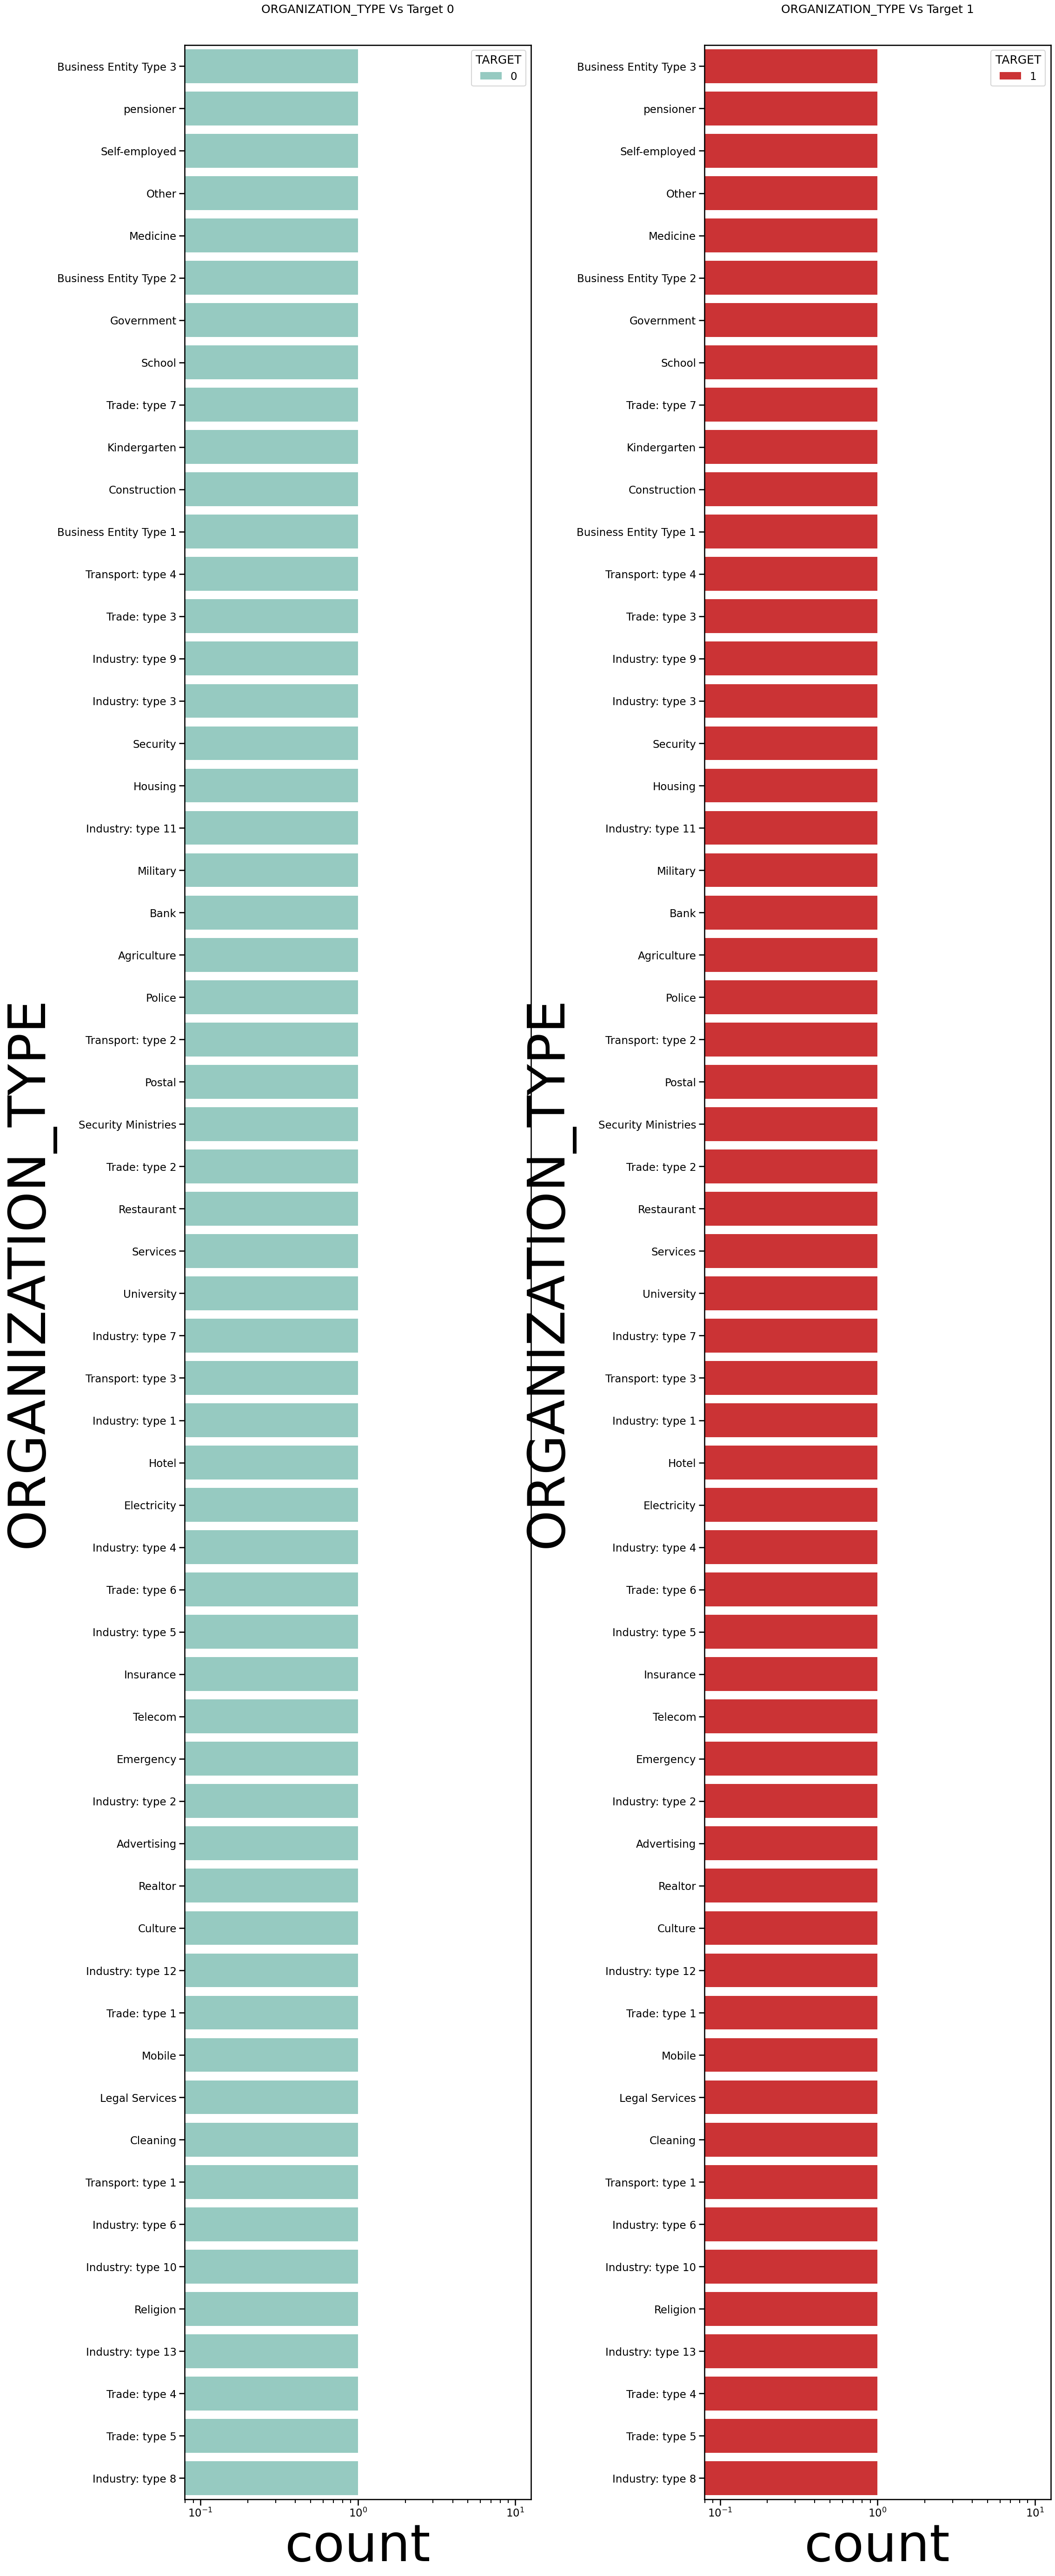

In [31]:
#organization’s Distribution Based on Target 0 and Target 1

plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3)


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df_cleaned['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df_cleaned['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")

plt.show();

In [83]:
#Creating function to plot graphs for all Categorical column w.r.t Target 0 and Target 1

def categorical_plot(var):
    plt.figure(figsize=(40,20))

    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target0, palette = 'Set3', hue='TARGET')
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)


    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

In [43]:
categorical_col = list(df_cleaned.select_dtypes(include= 'object').columns)


# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots

categorical_col.remove('ORGANIZATION_TYPE')
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

categorical_col #Checking after removing columns

ValueError: list.remove(x): x not in list

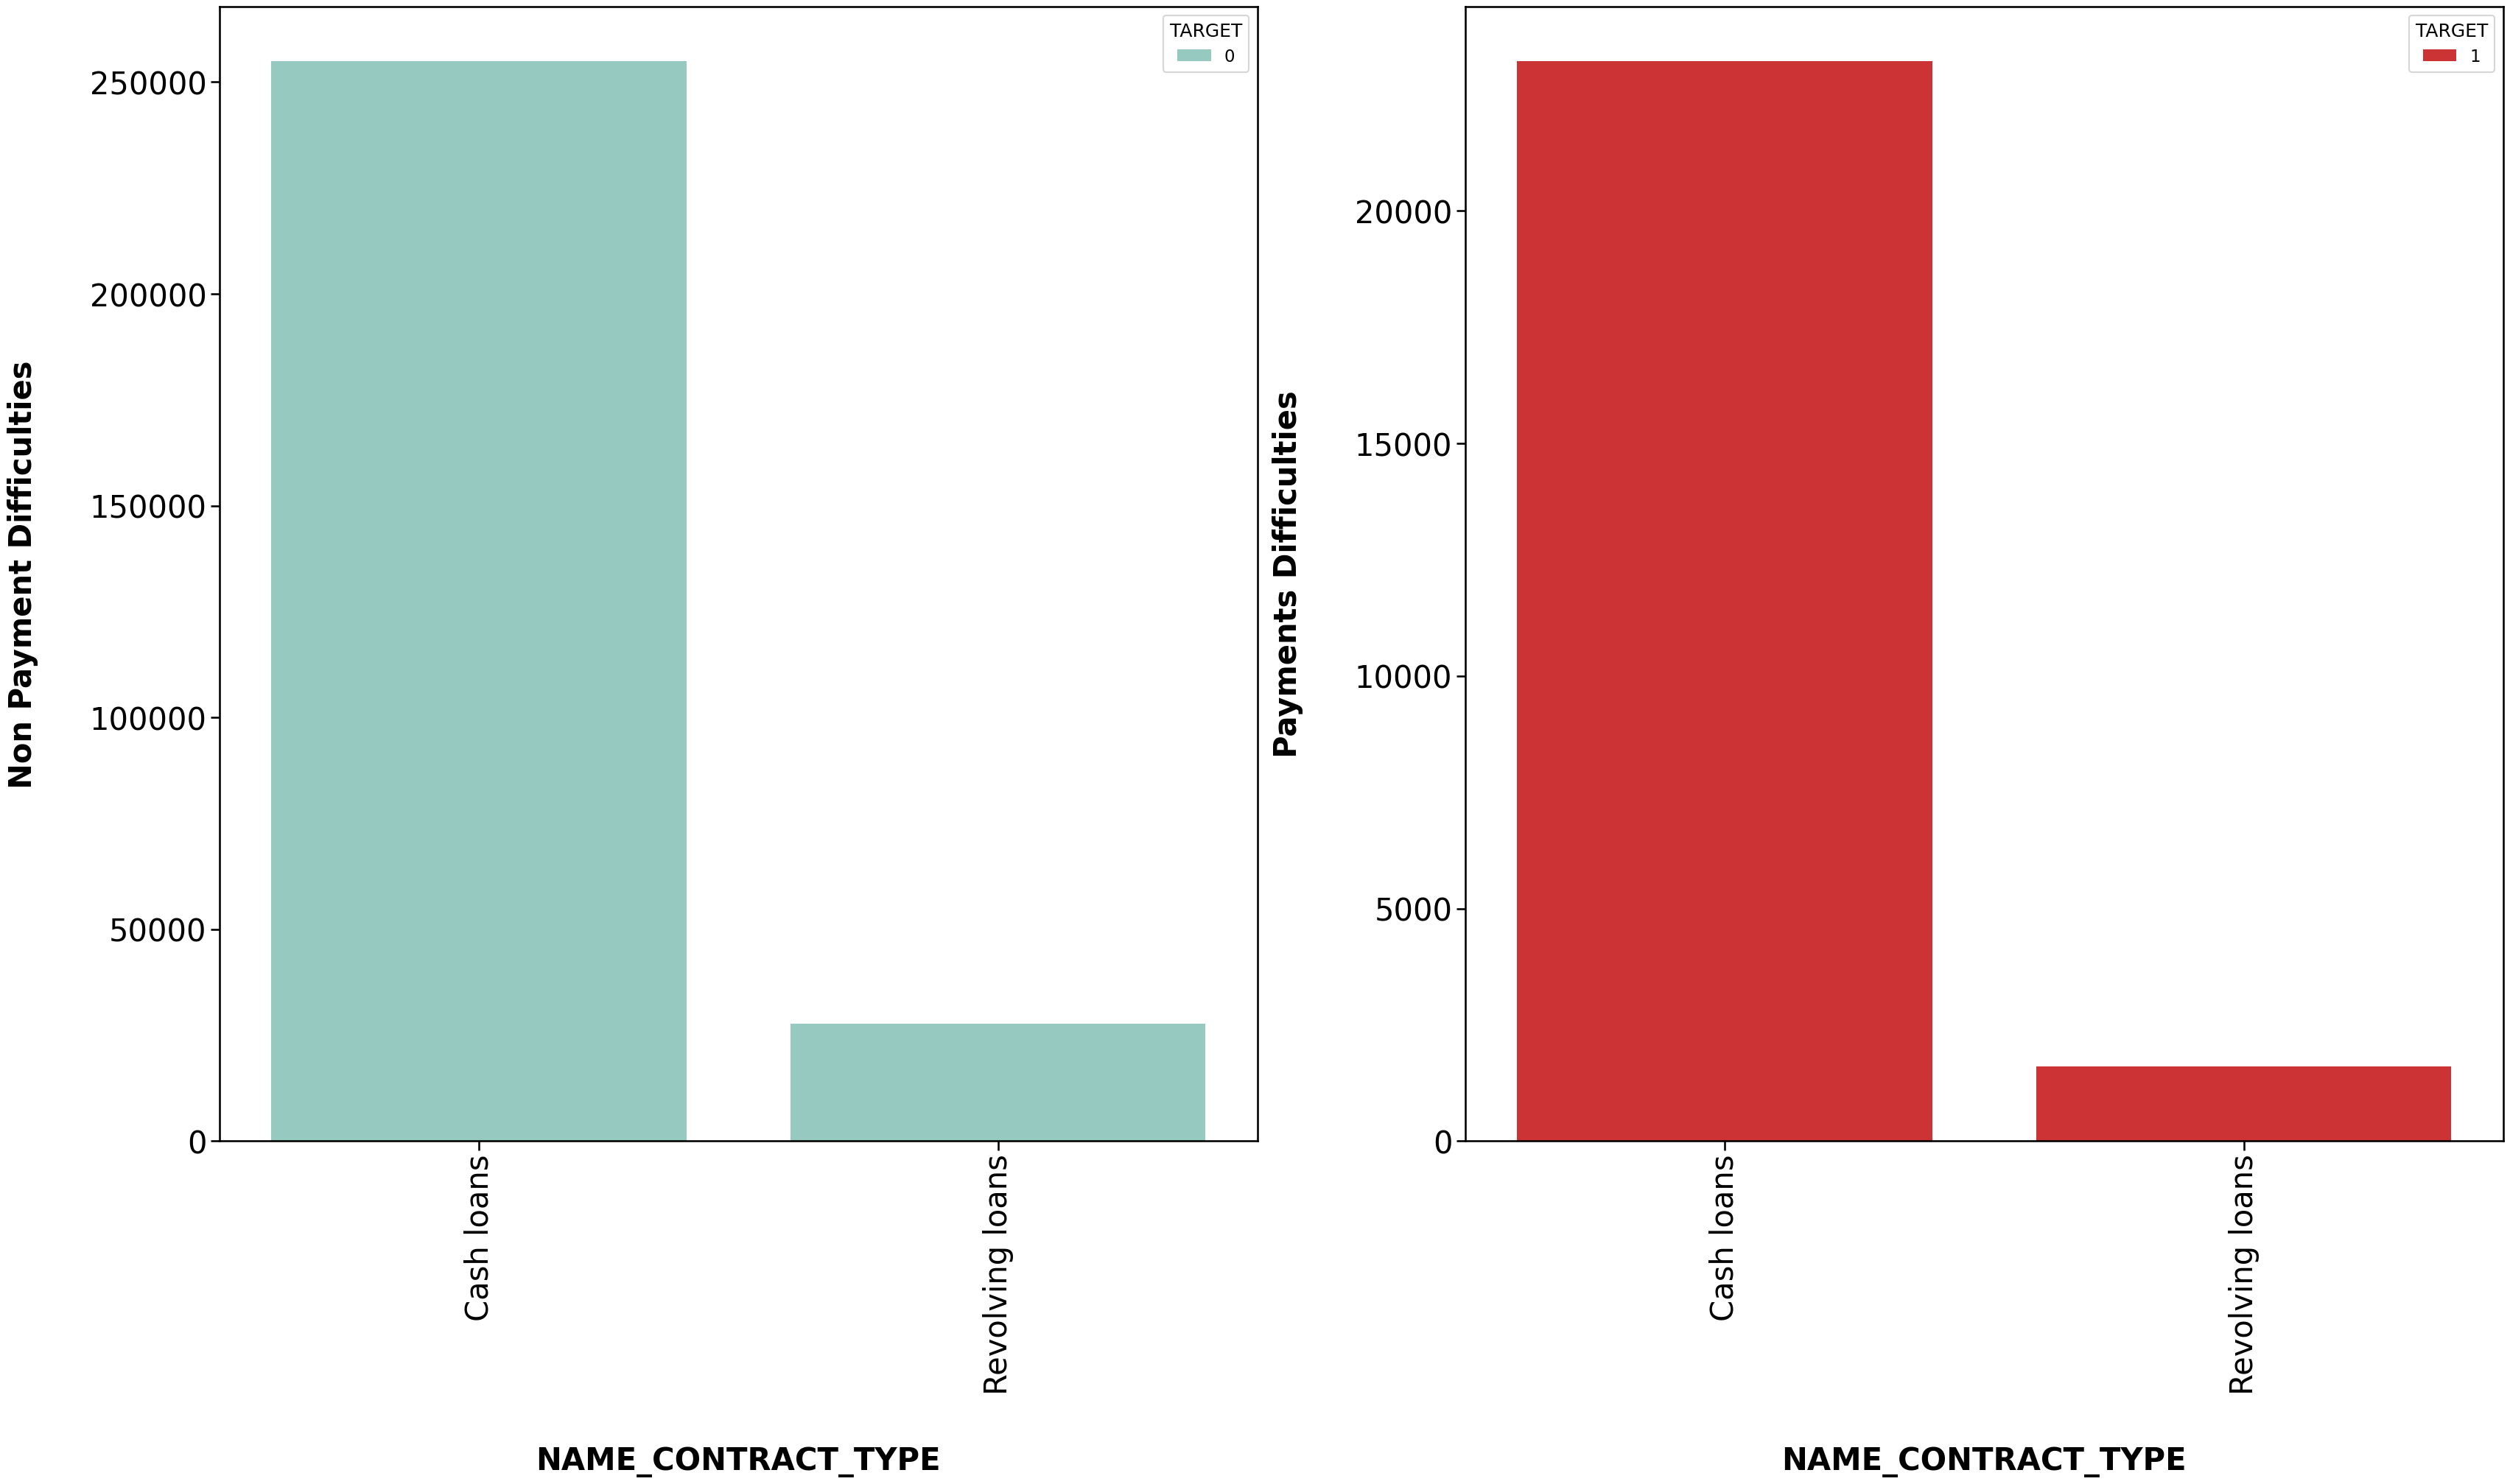

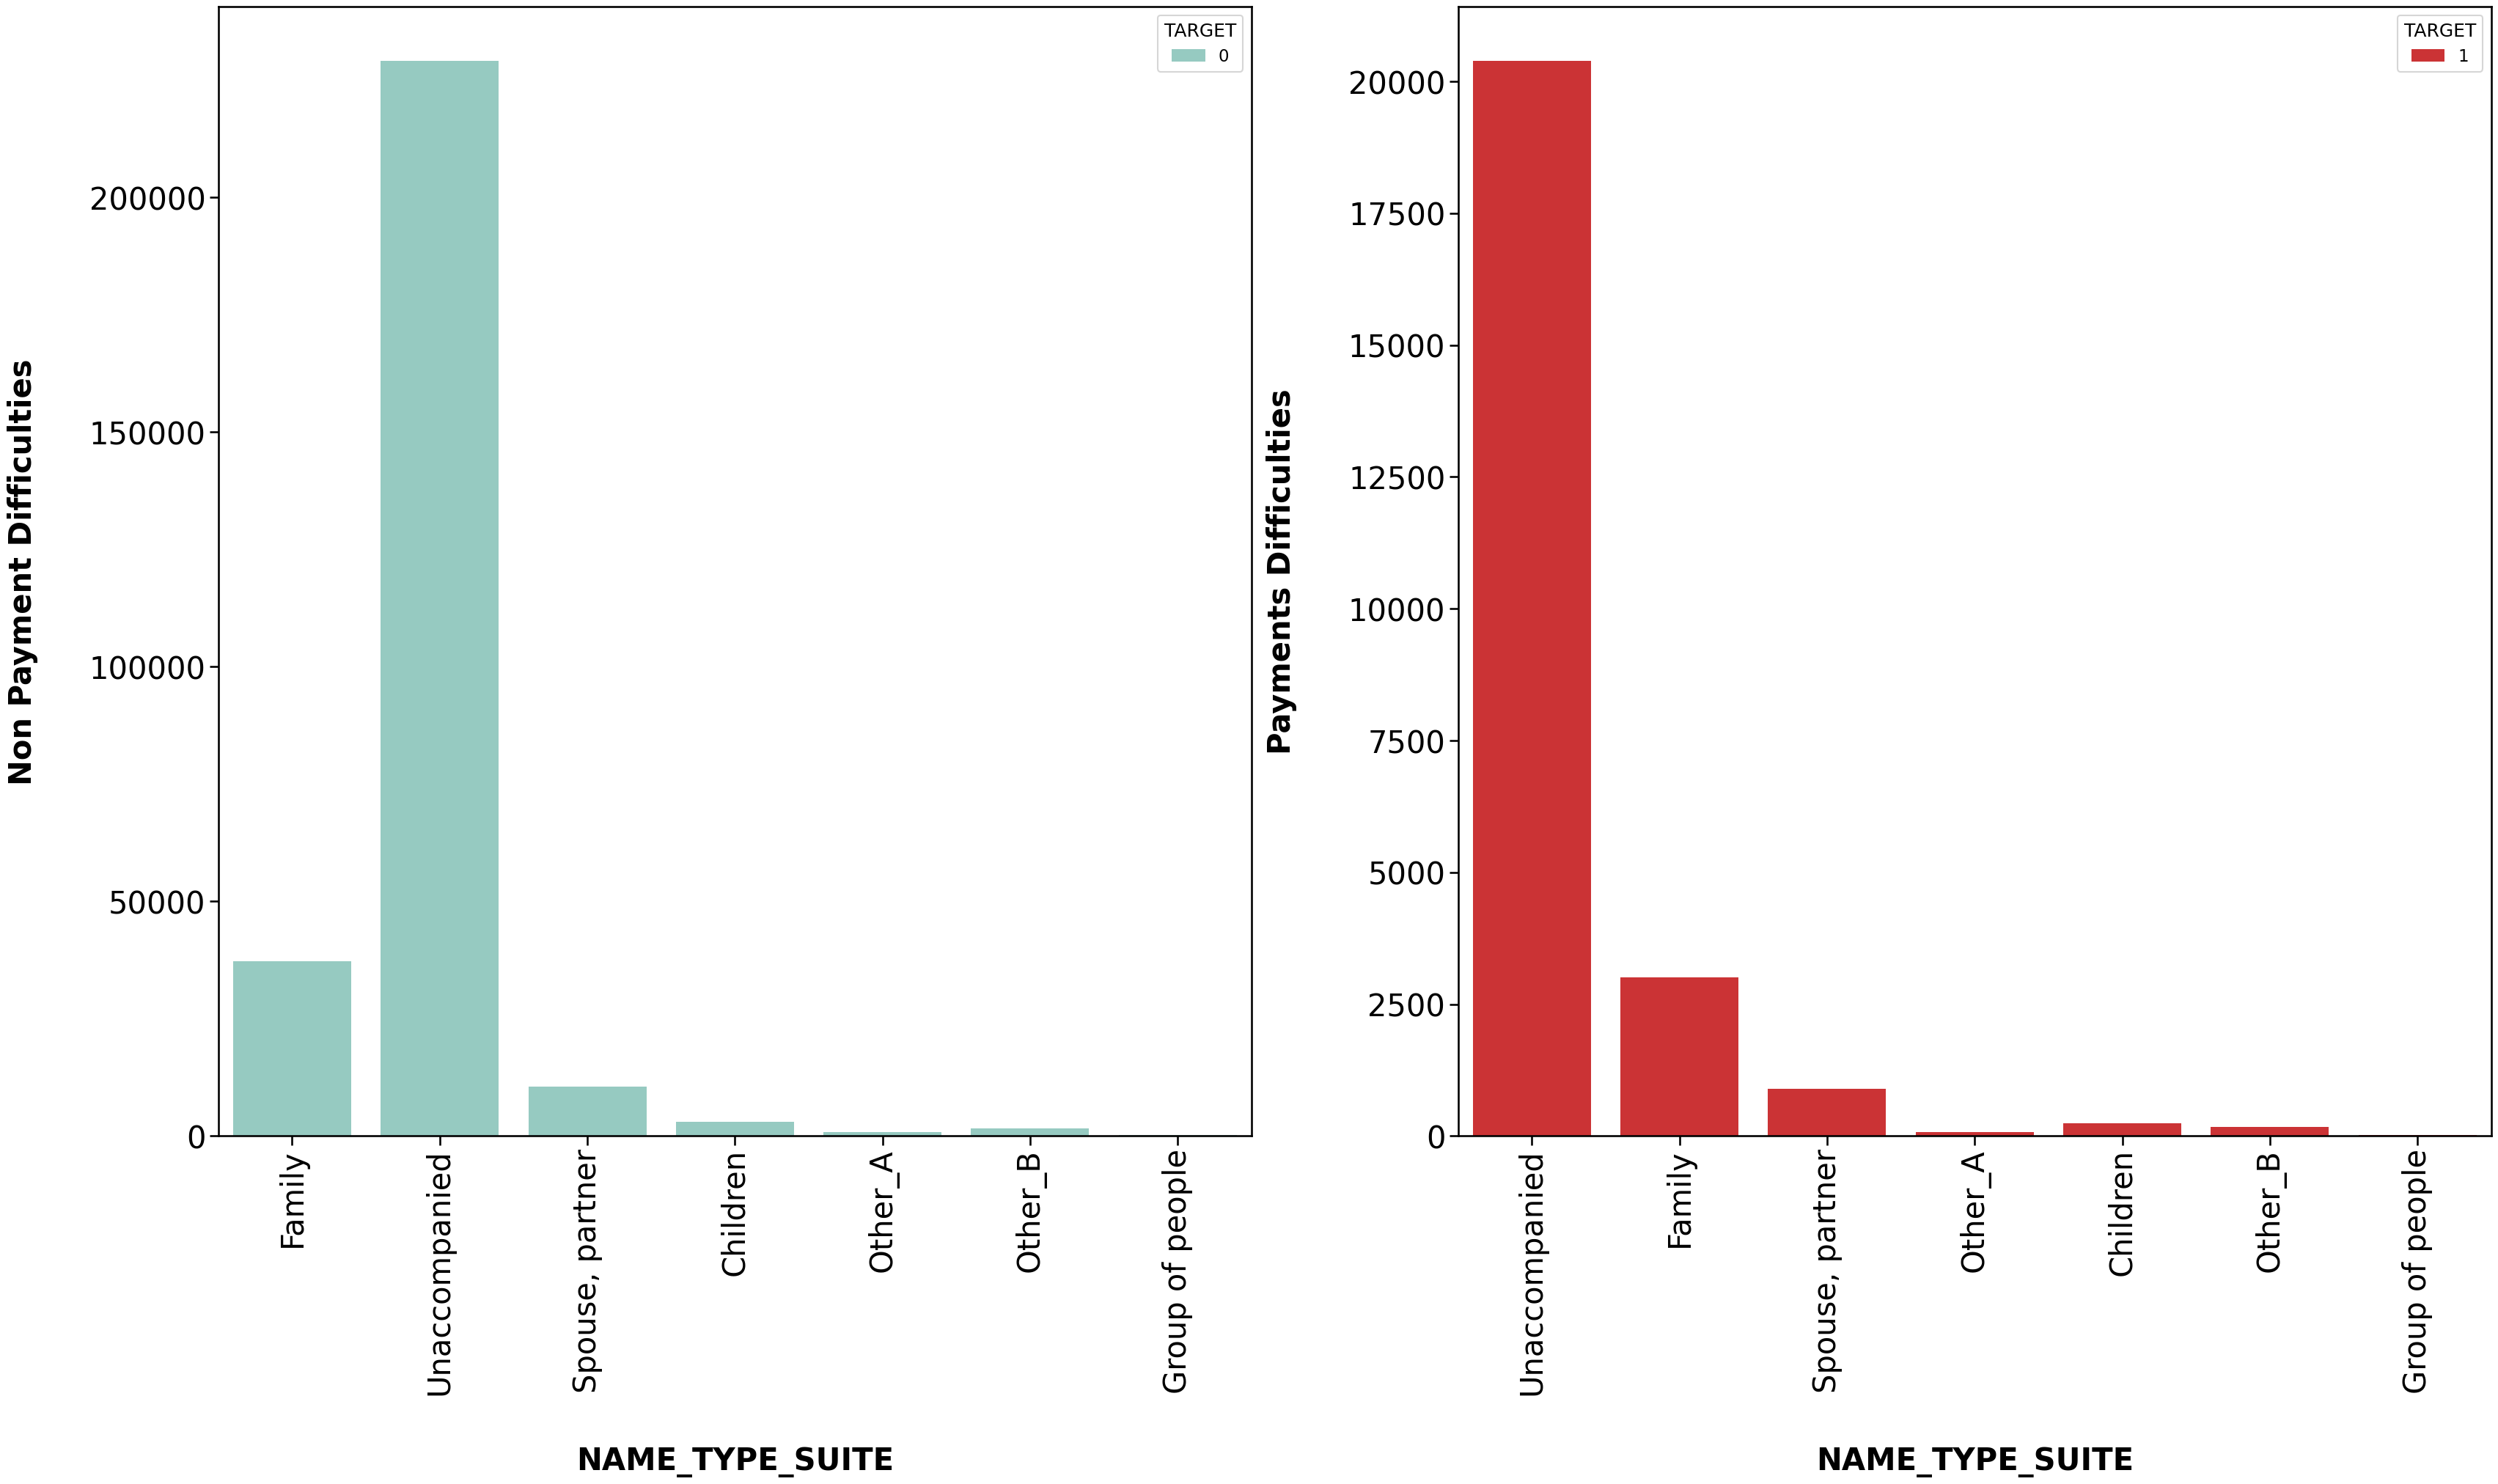

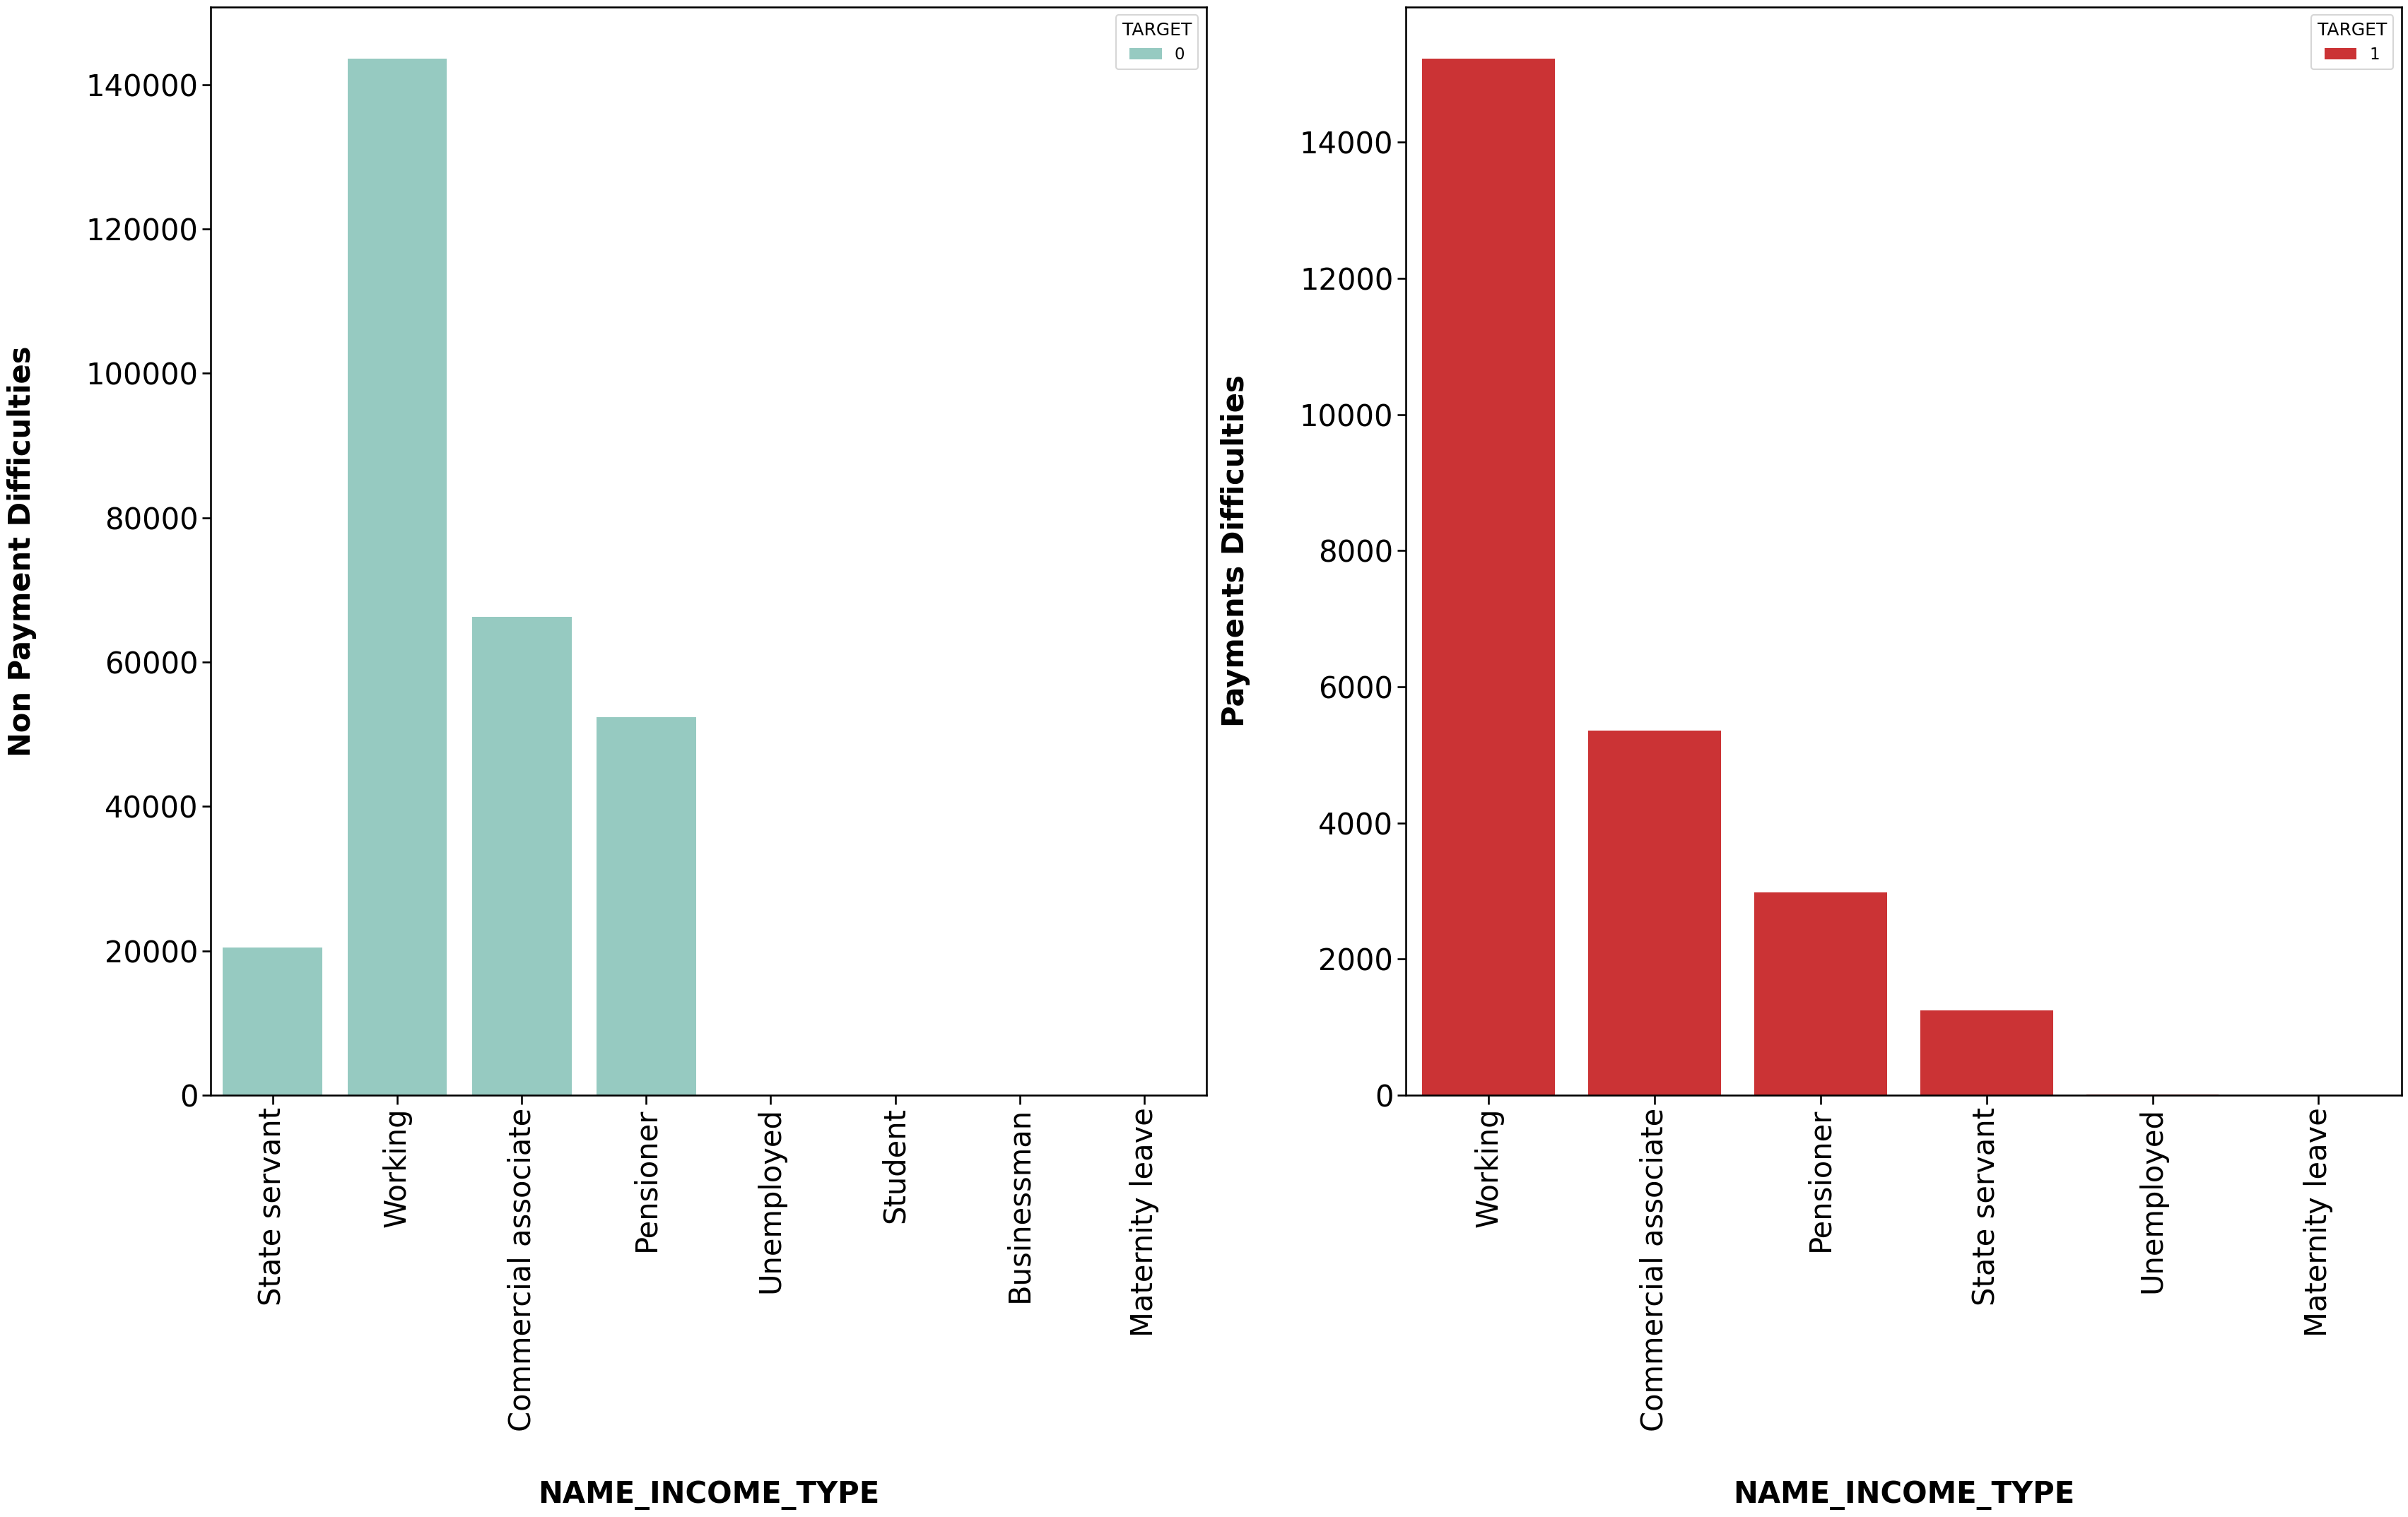

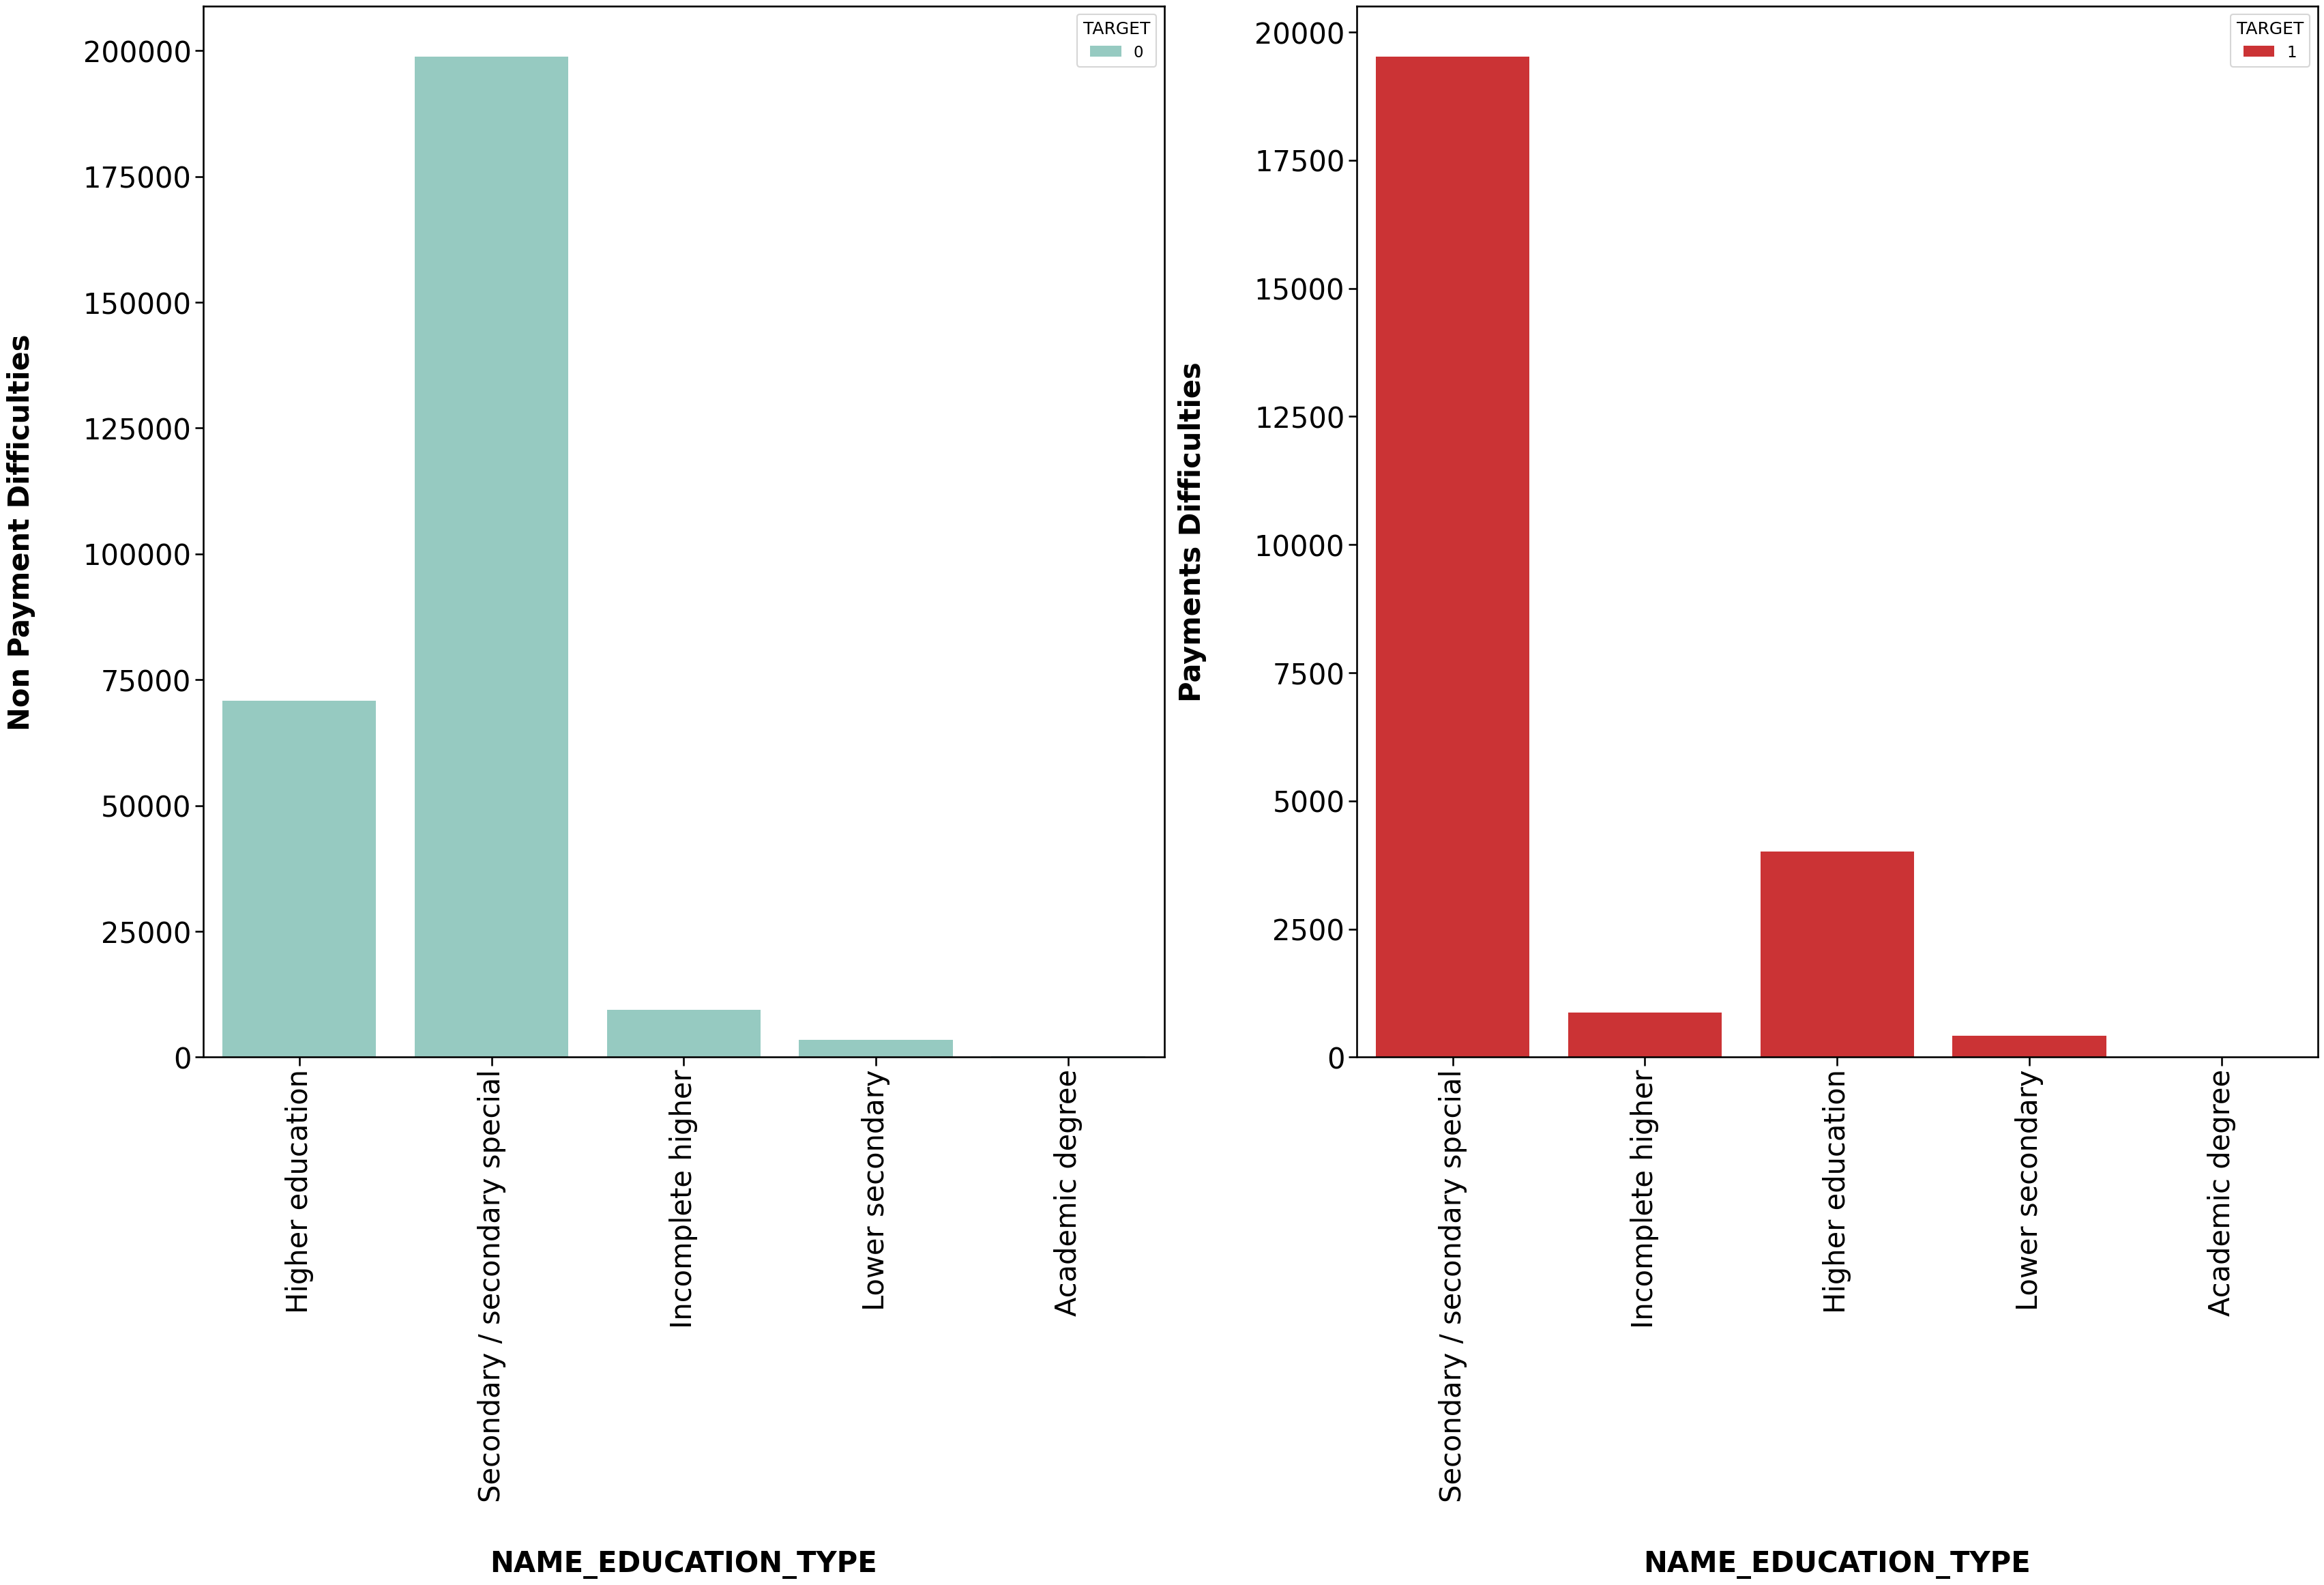

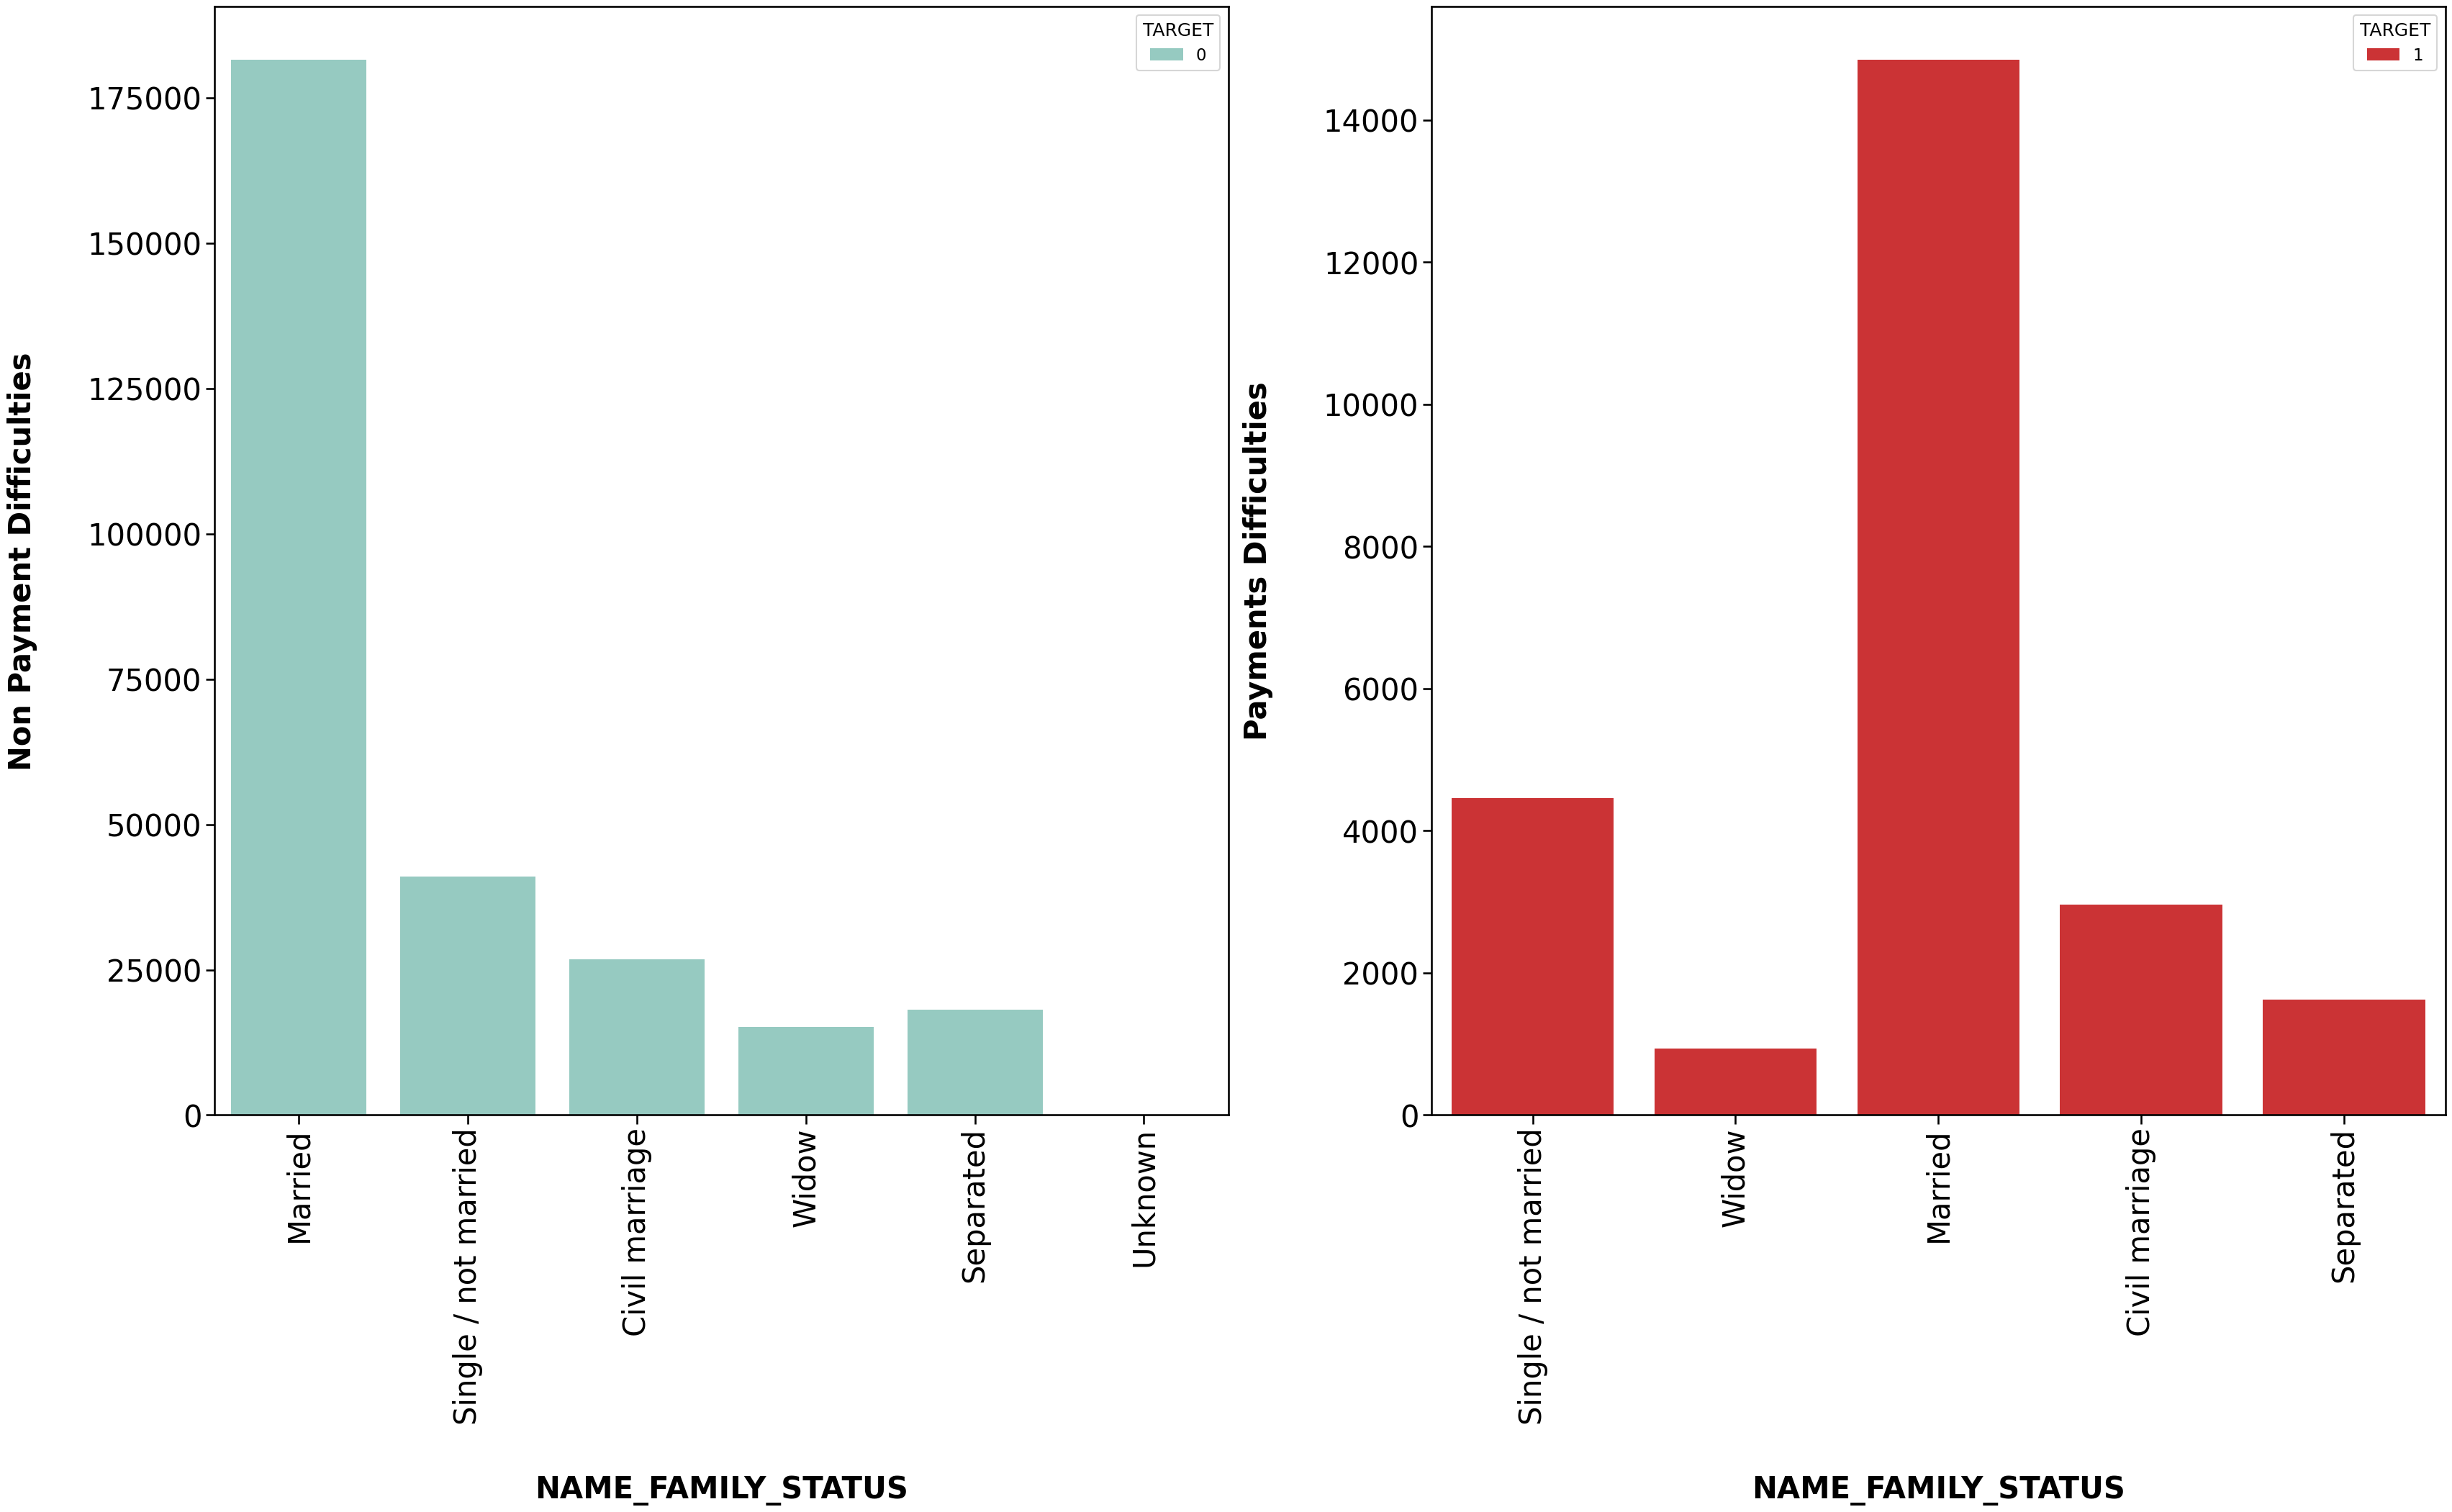

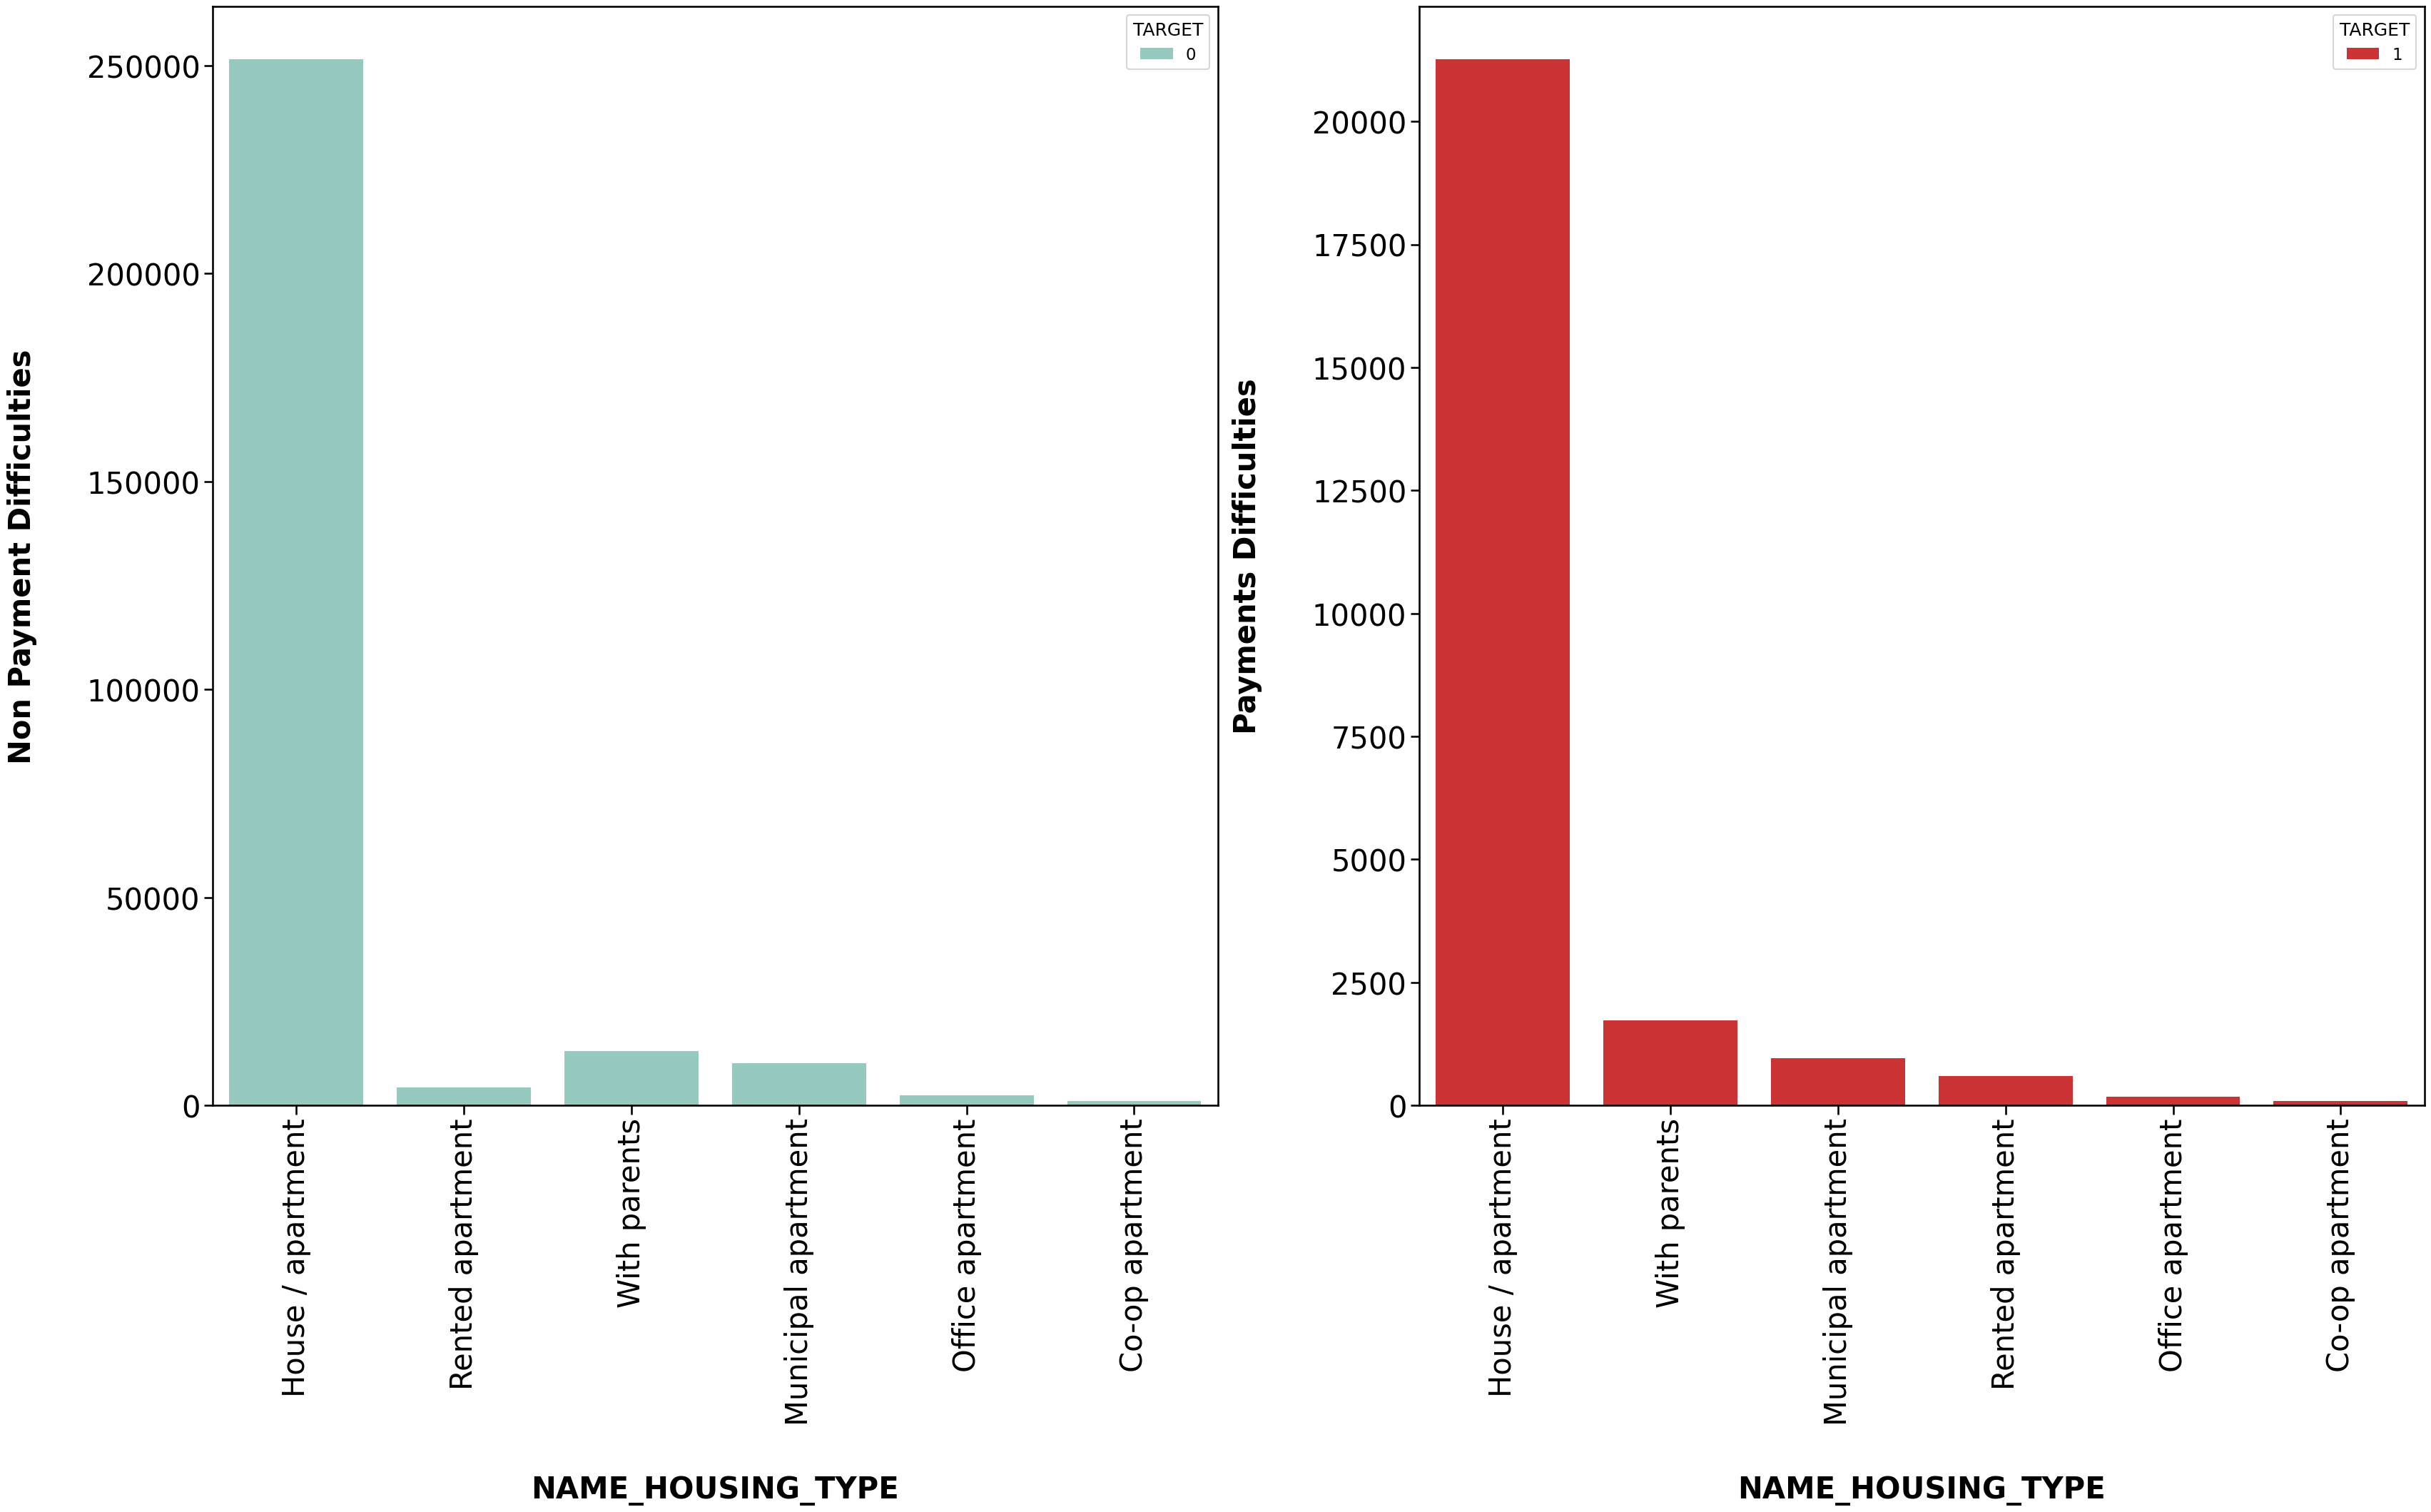

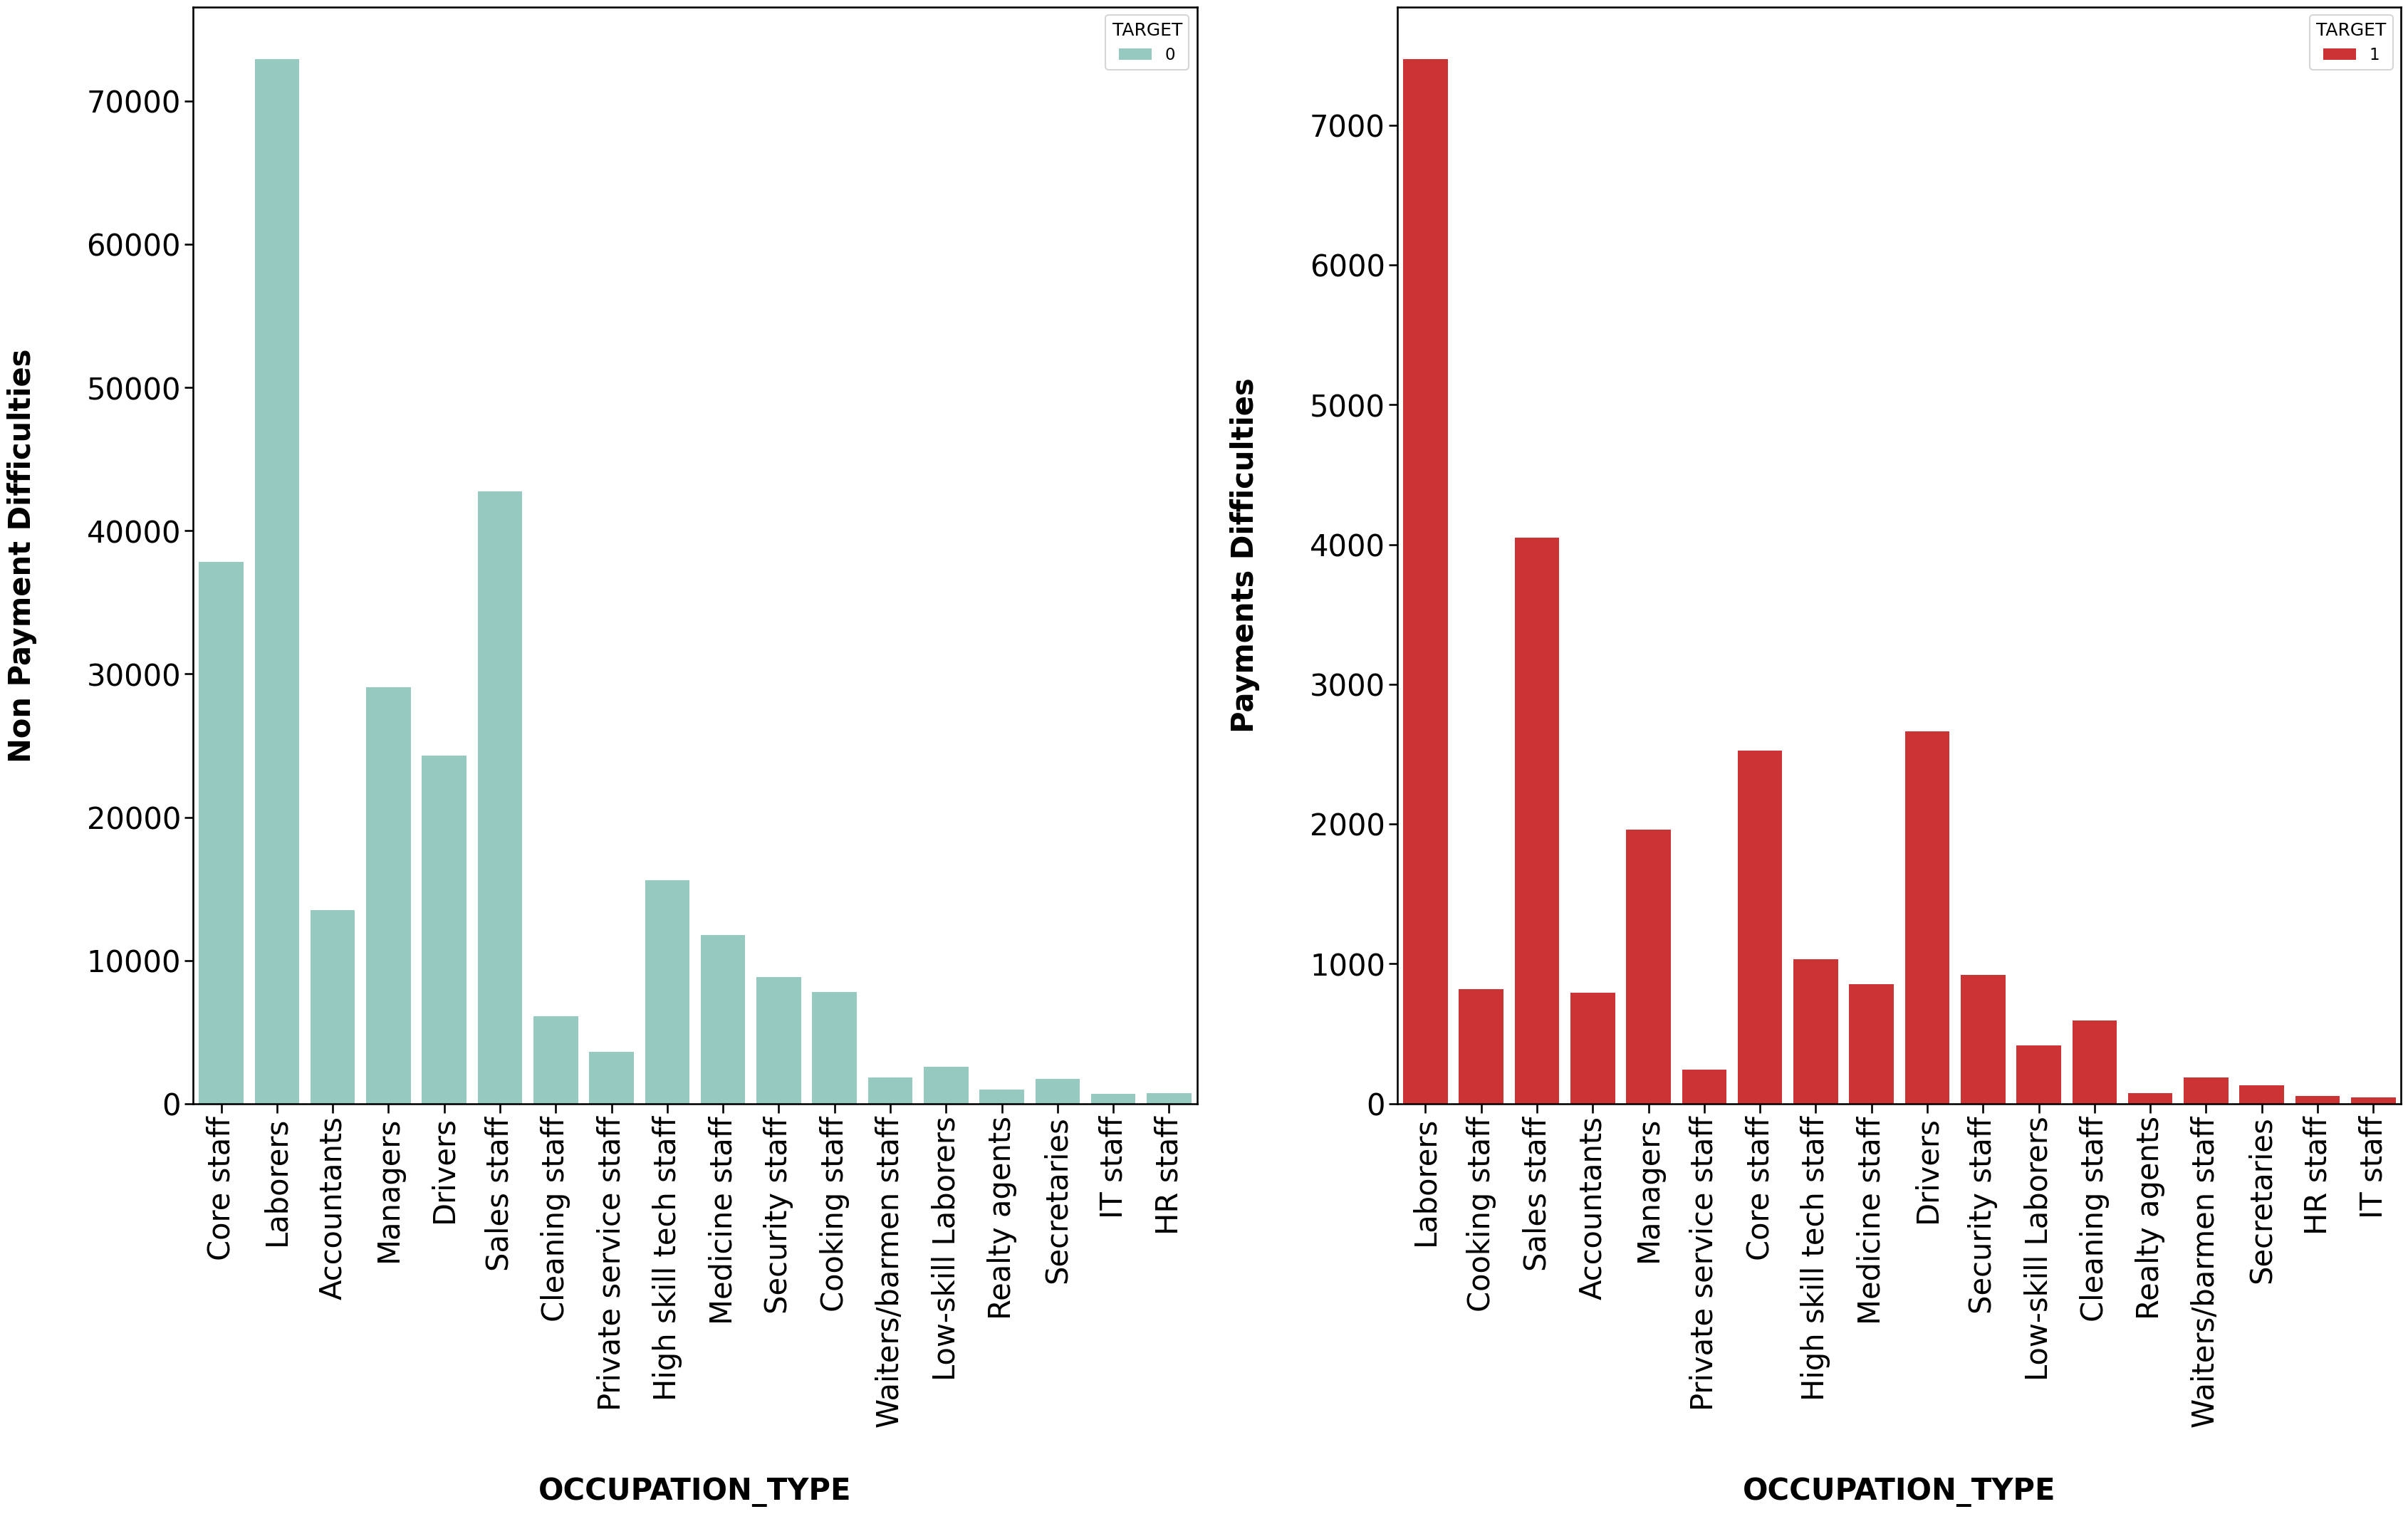

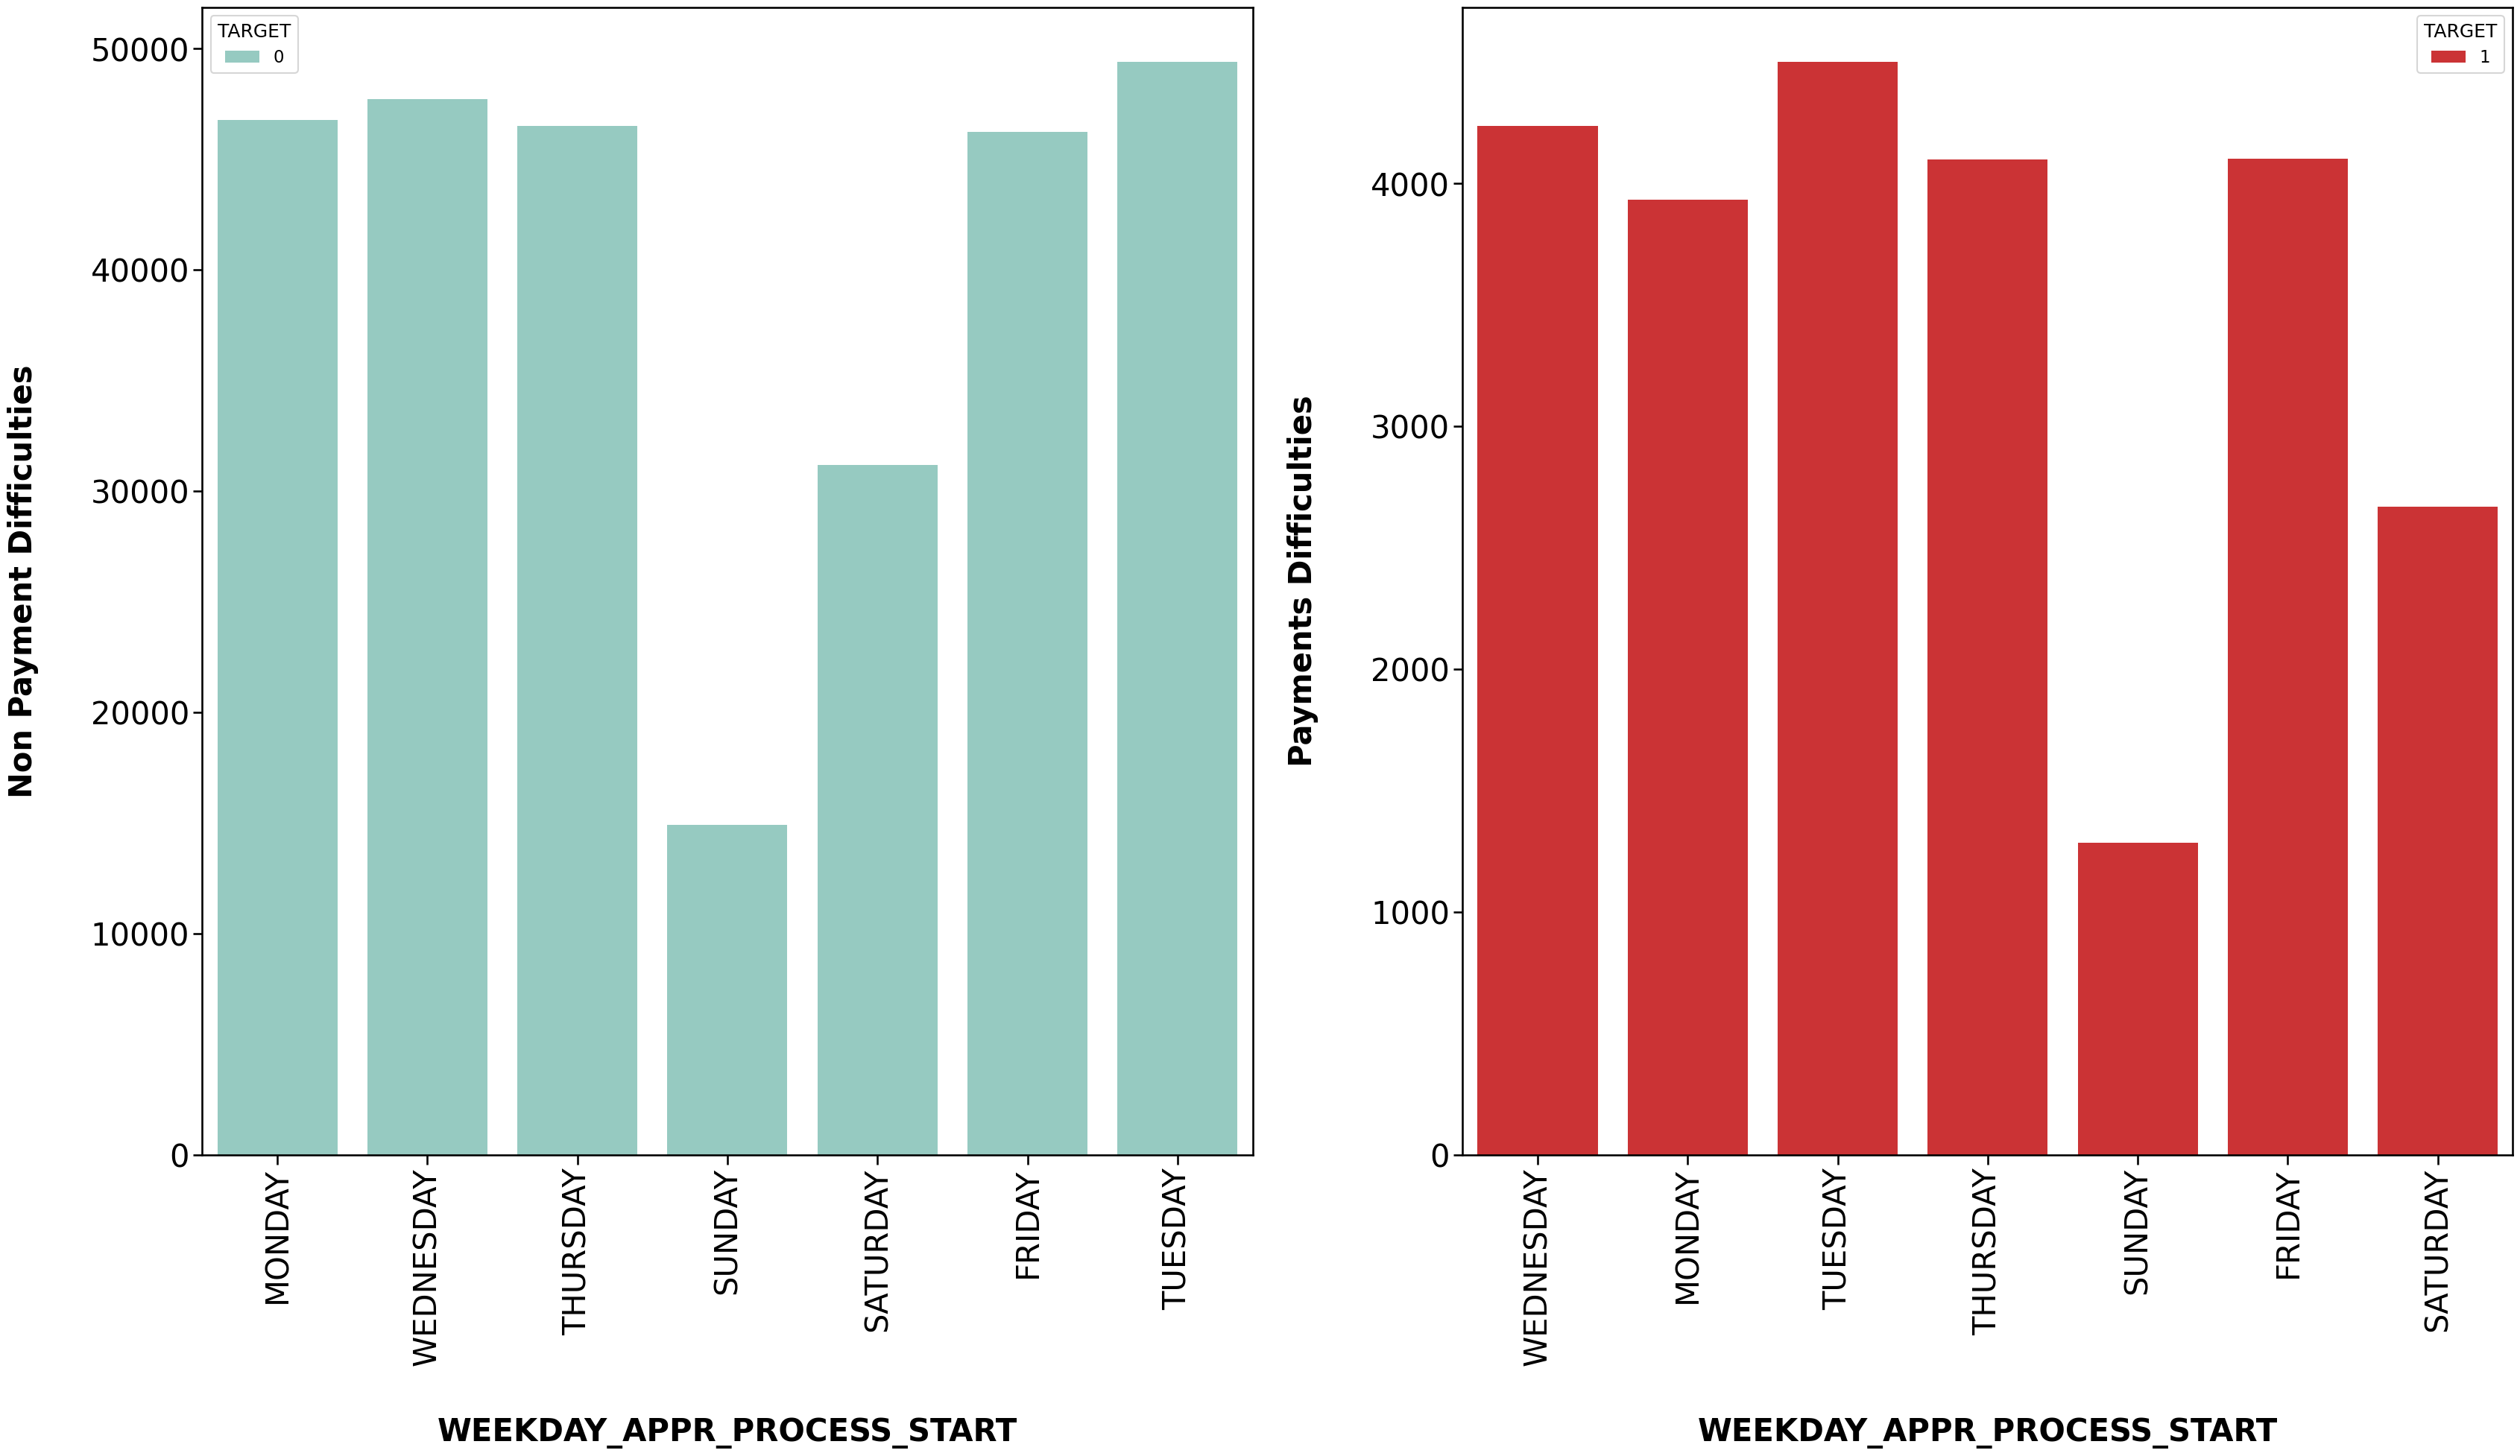

In [48]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))

    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    # Pass the column name as 'x' and the data as 'data'
    sns.countplot(x=var, data=Target0, palette = 'Set3', hue='TARGET')
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)


    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    # Pass the column name as 'x' and the data as 'data'
    sns.countplot(x=var, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()


for col in categorical_col:
    categorical_plot(col)

<ipython-input-51-8b59c7e09b5e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
<ipython-input-51-8b59c7e09b5e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


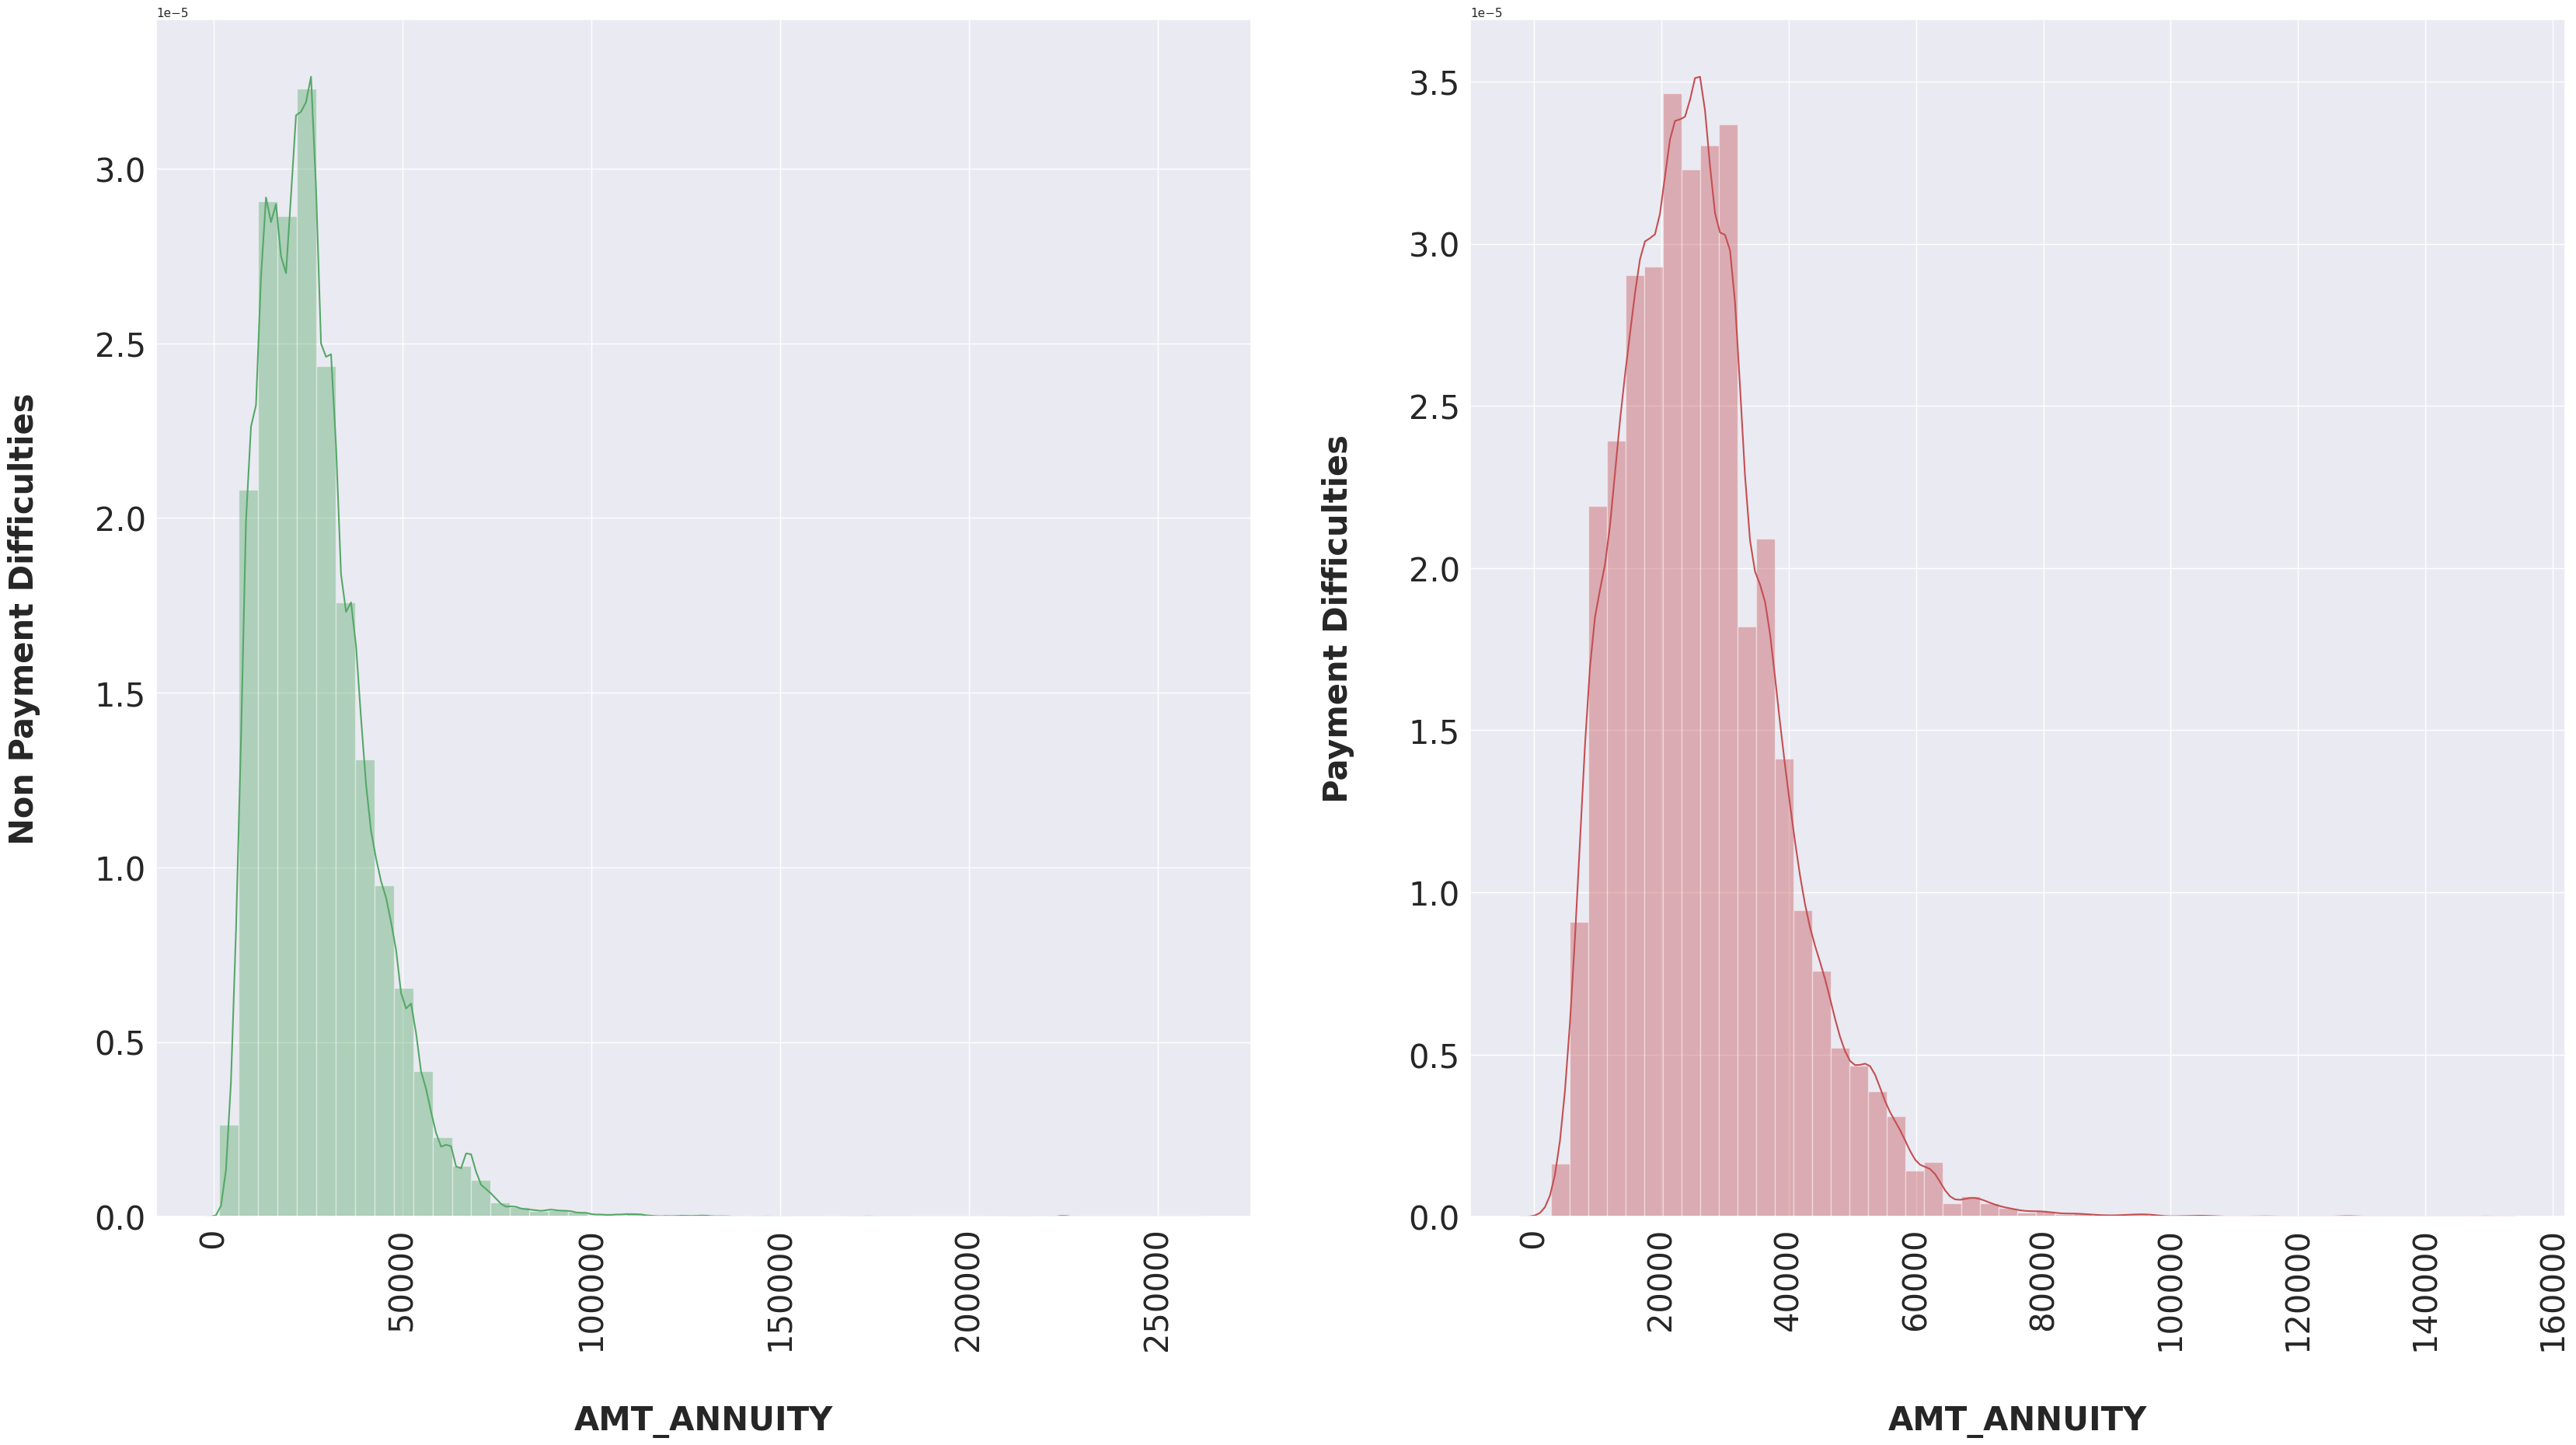

In [51]:
#Univariate Analysis of Numerical Columns W.R.T Target Variable

def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))


    plt.subplot(1,2,1)
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)




    plt.subplot(1,2,2)
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    plt.show();



<ipython-input-51-8b59c7e09b5e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
<ipython-input-51-8b59c7e09b5e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


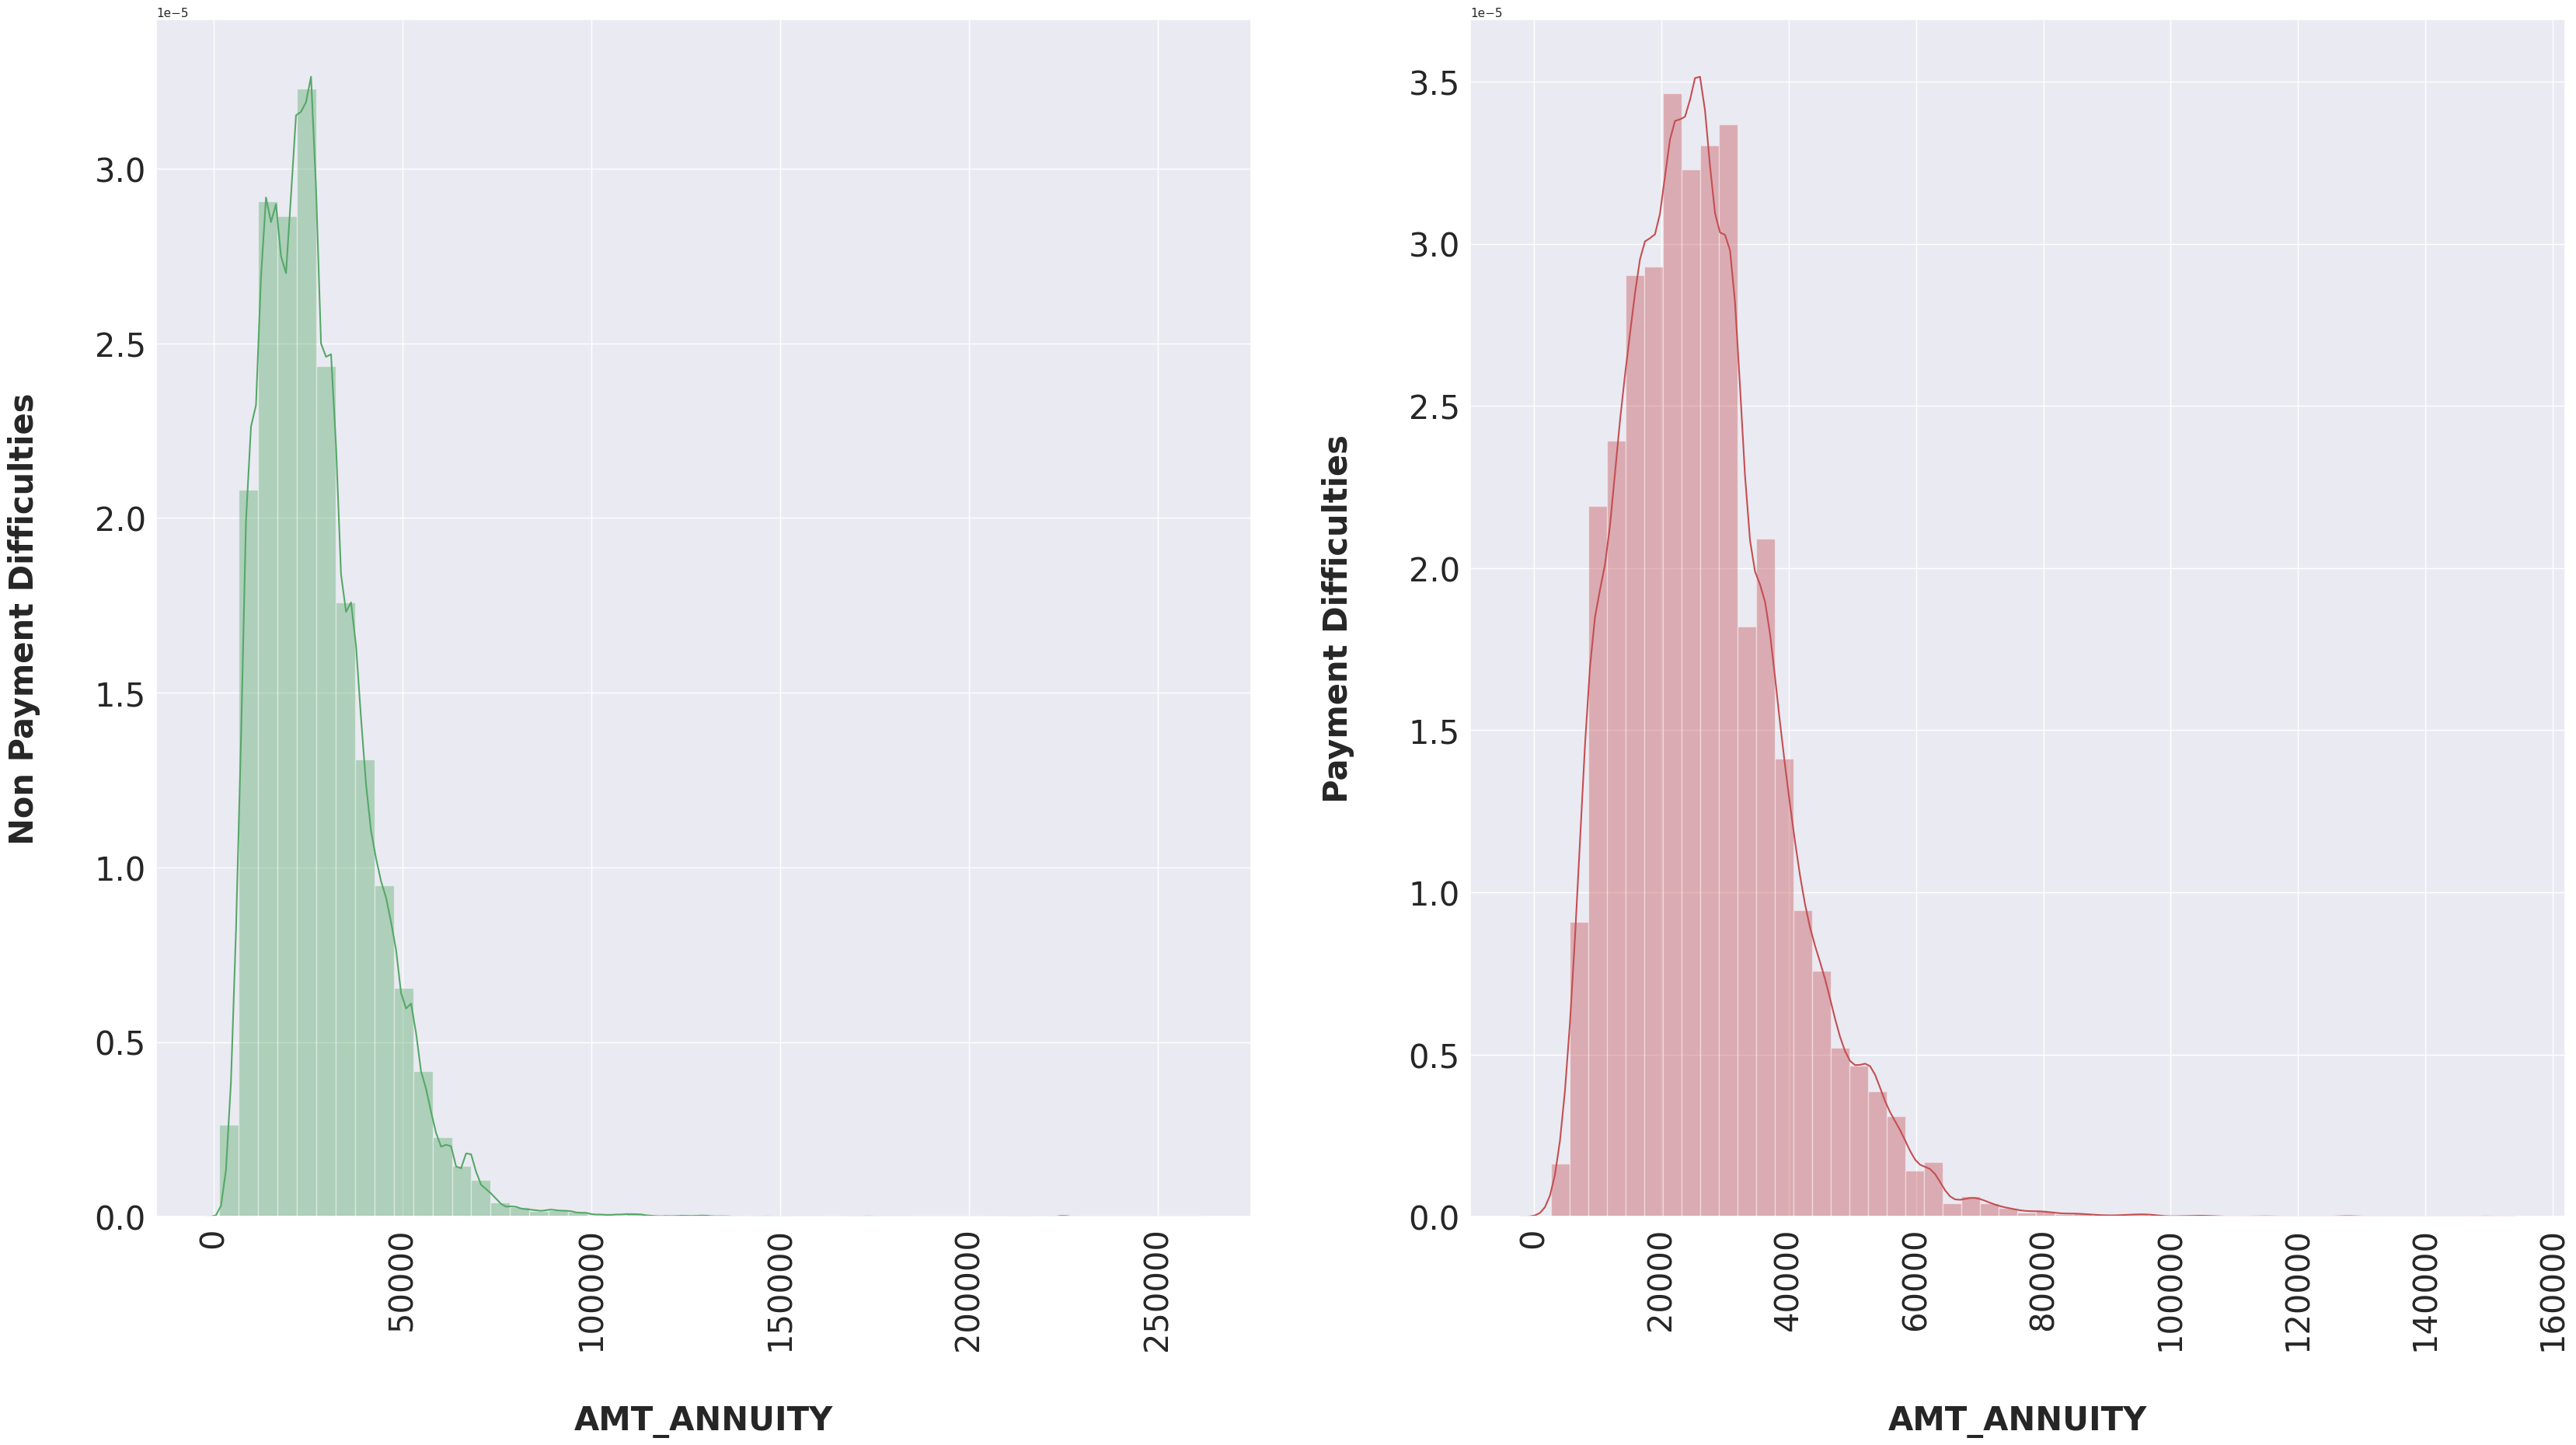

In [52]:
#Annuity amount based on Target 0 and Target 1

uni(col='AMT_ANNUITY')

<ipython-input-51-8b59c7e09b5e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
<ipython-input-51-8b59c7e09b5e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


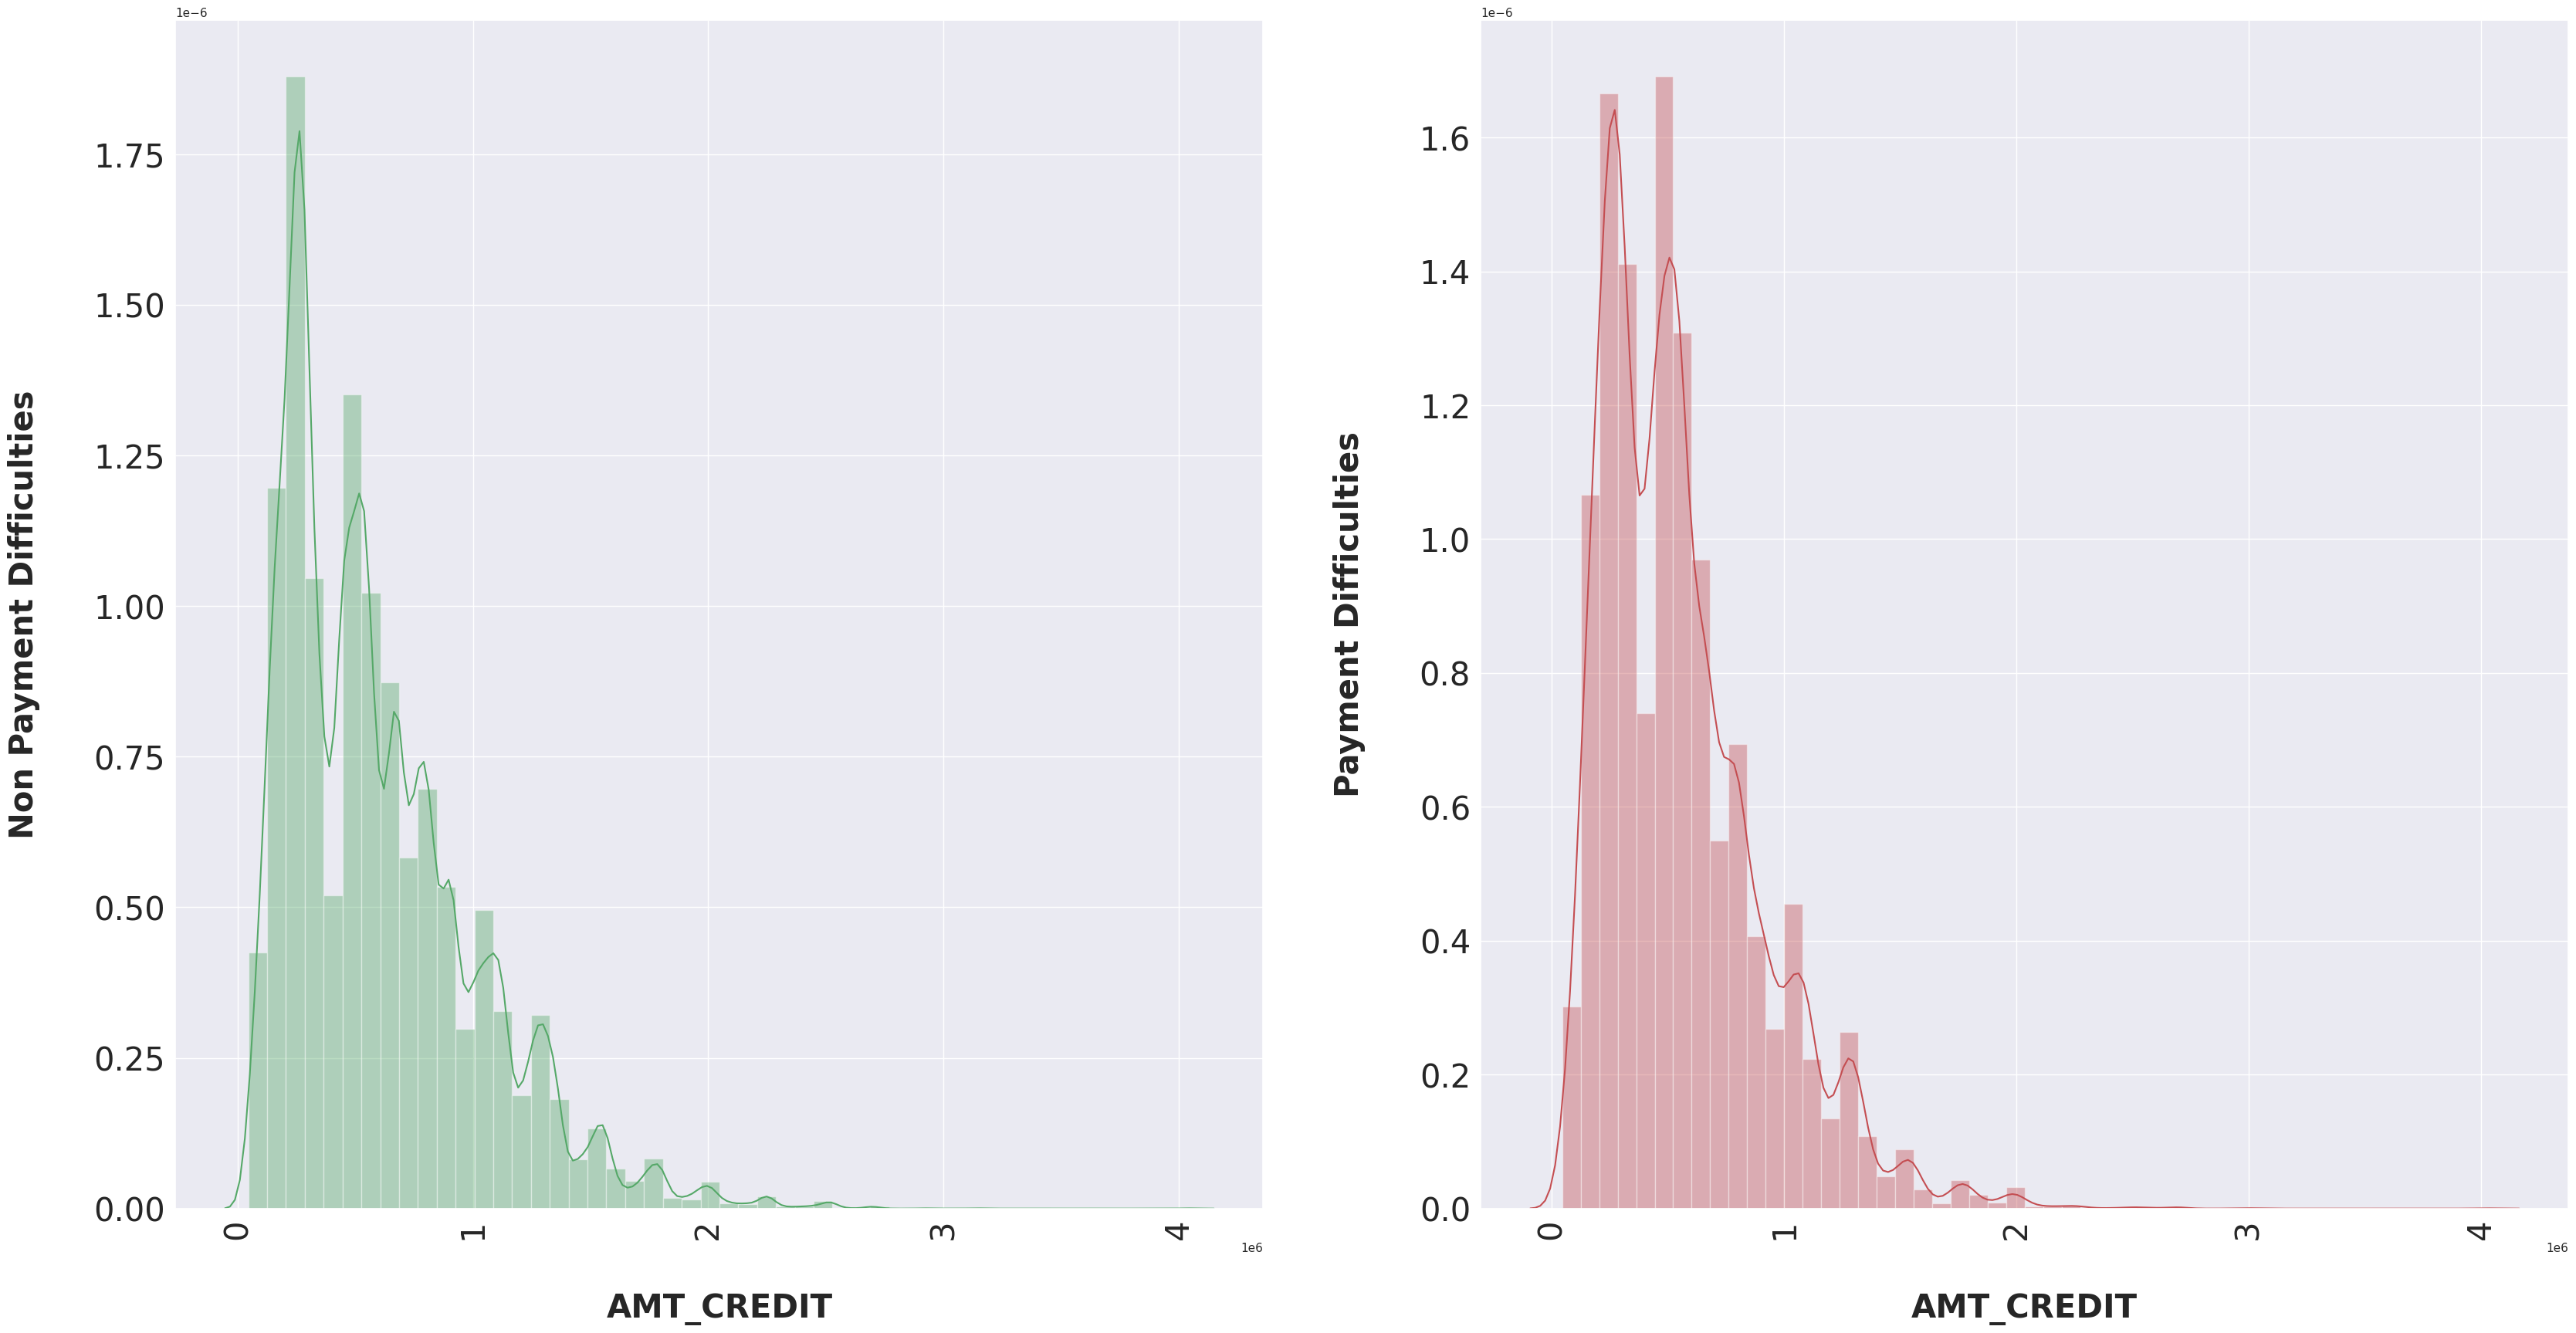

In [53]:
#Credit Amount based on Target 0 and Target 1

uni(col='AMT_CREDIT')

<ipython-input-51-8b59c7e09b5e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
<ipython-input-51-8b59c7e09b5e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


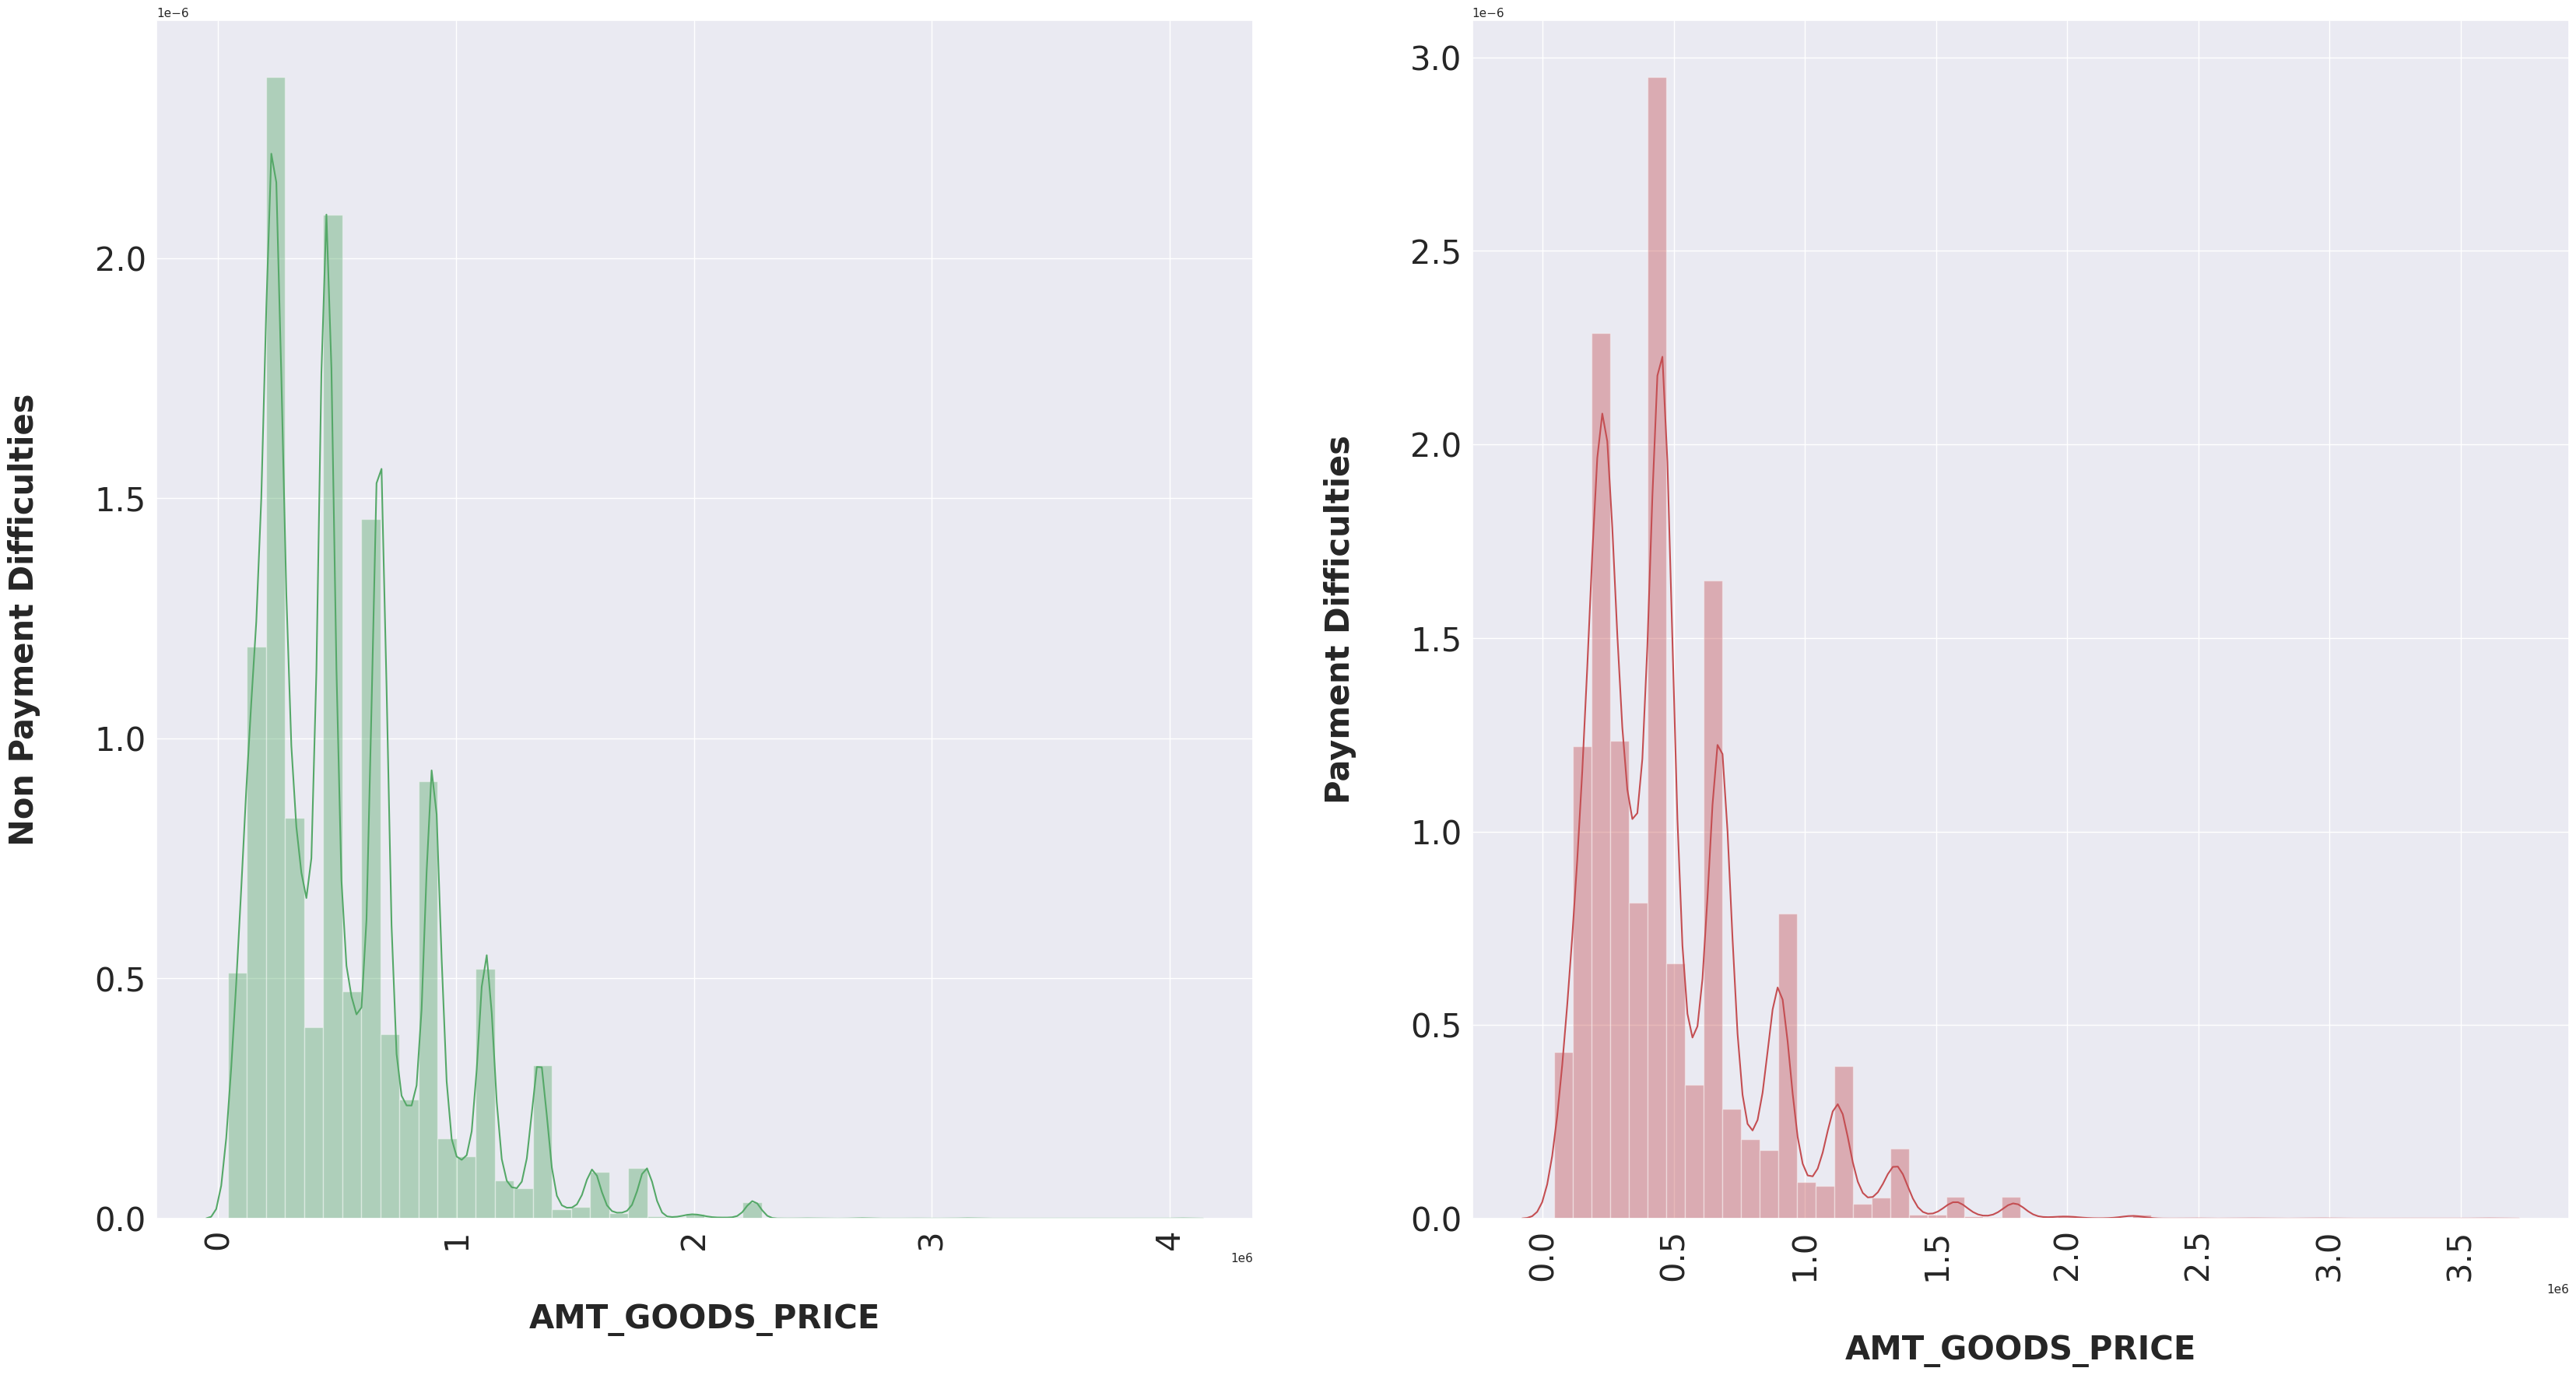

In [54]:
#Price of Goods based on Target 0 and Target 1
uni(col='AMT_GOODS_PRICE')


<ipython-input-51-8b59c7e09b5e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
<ipython-input-51-8b59c7e09b5e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


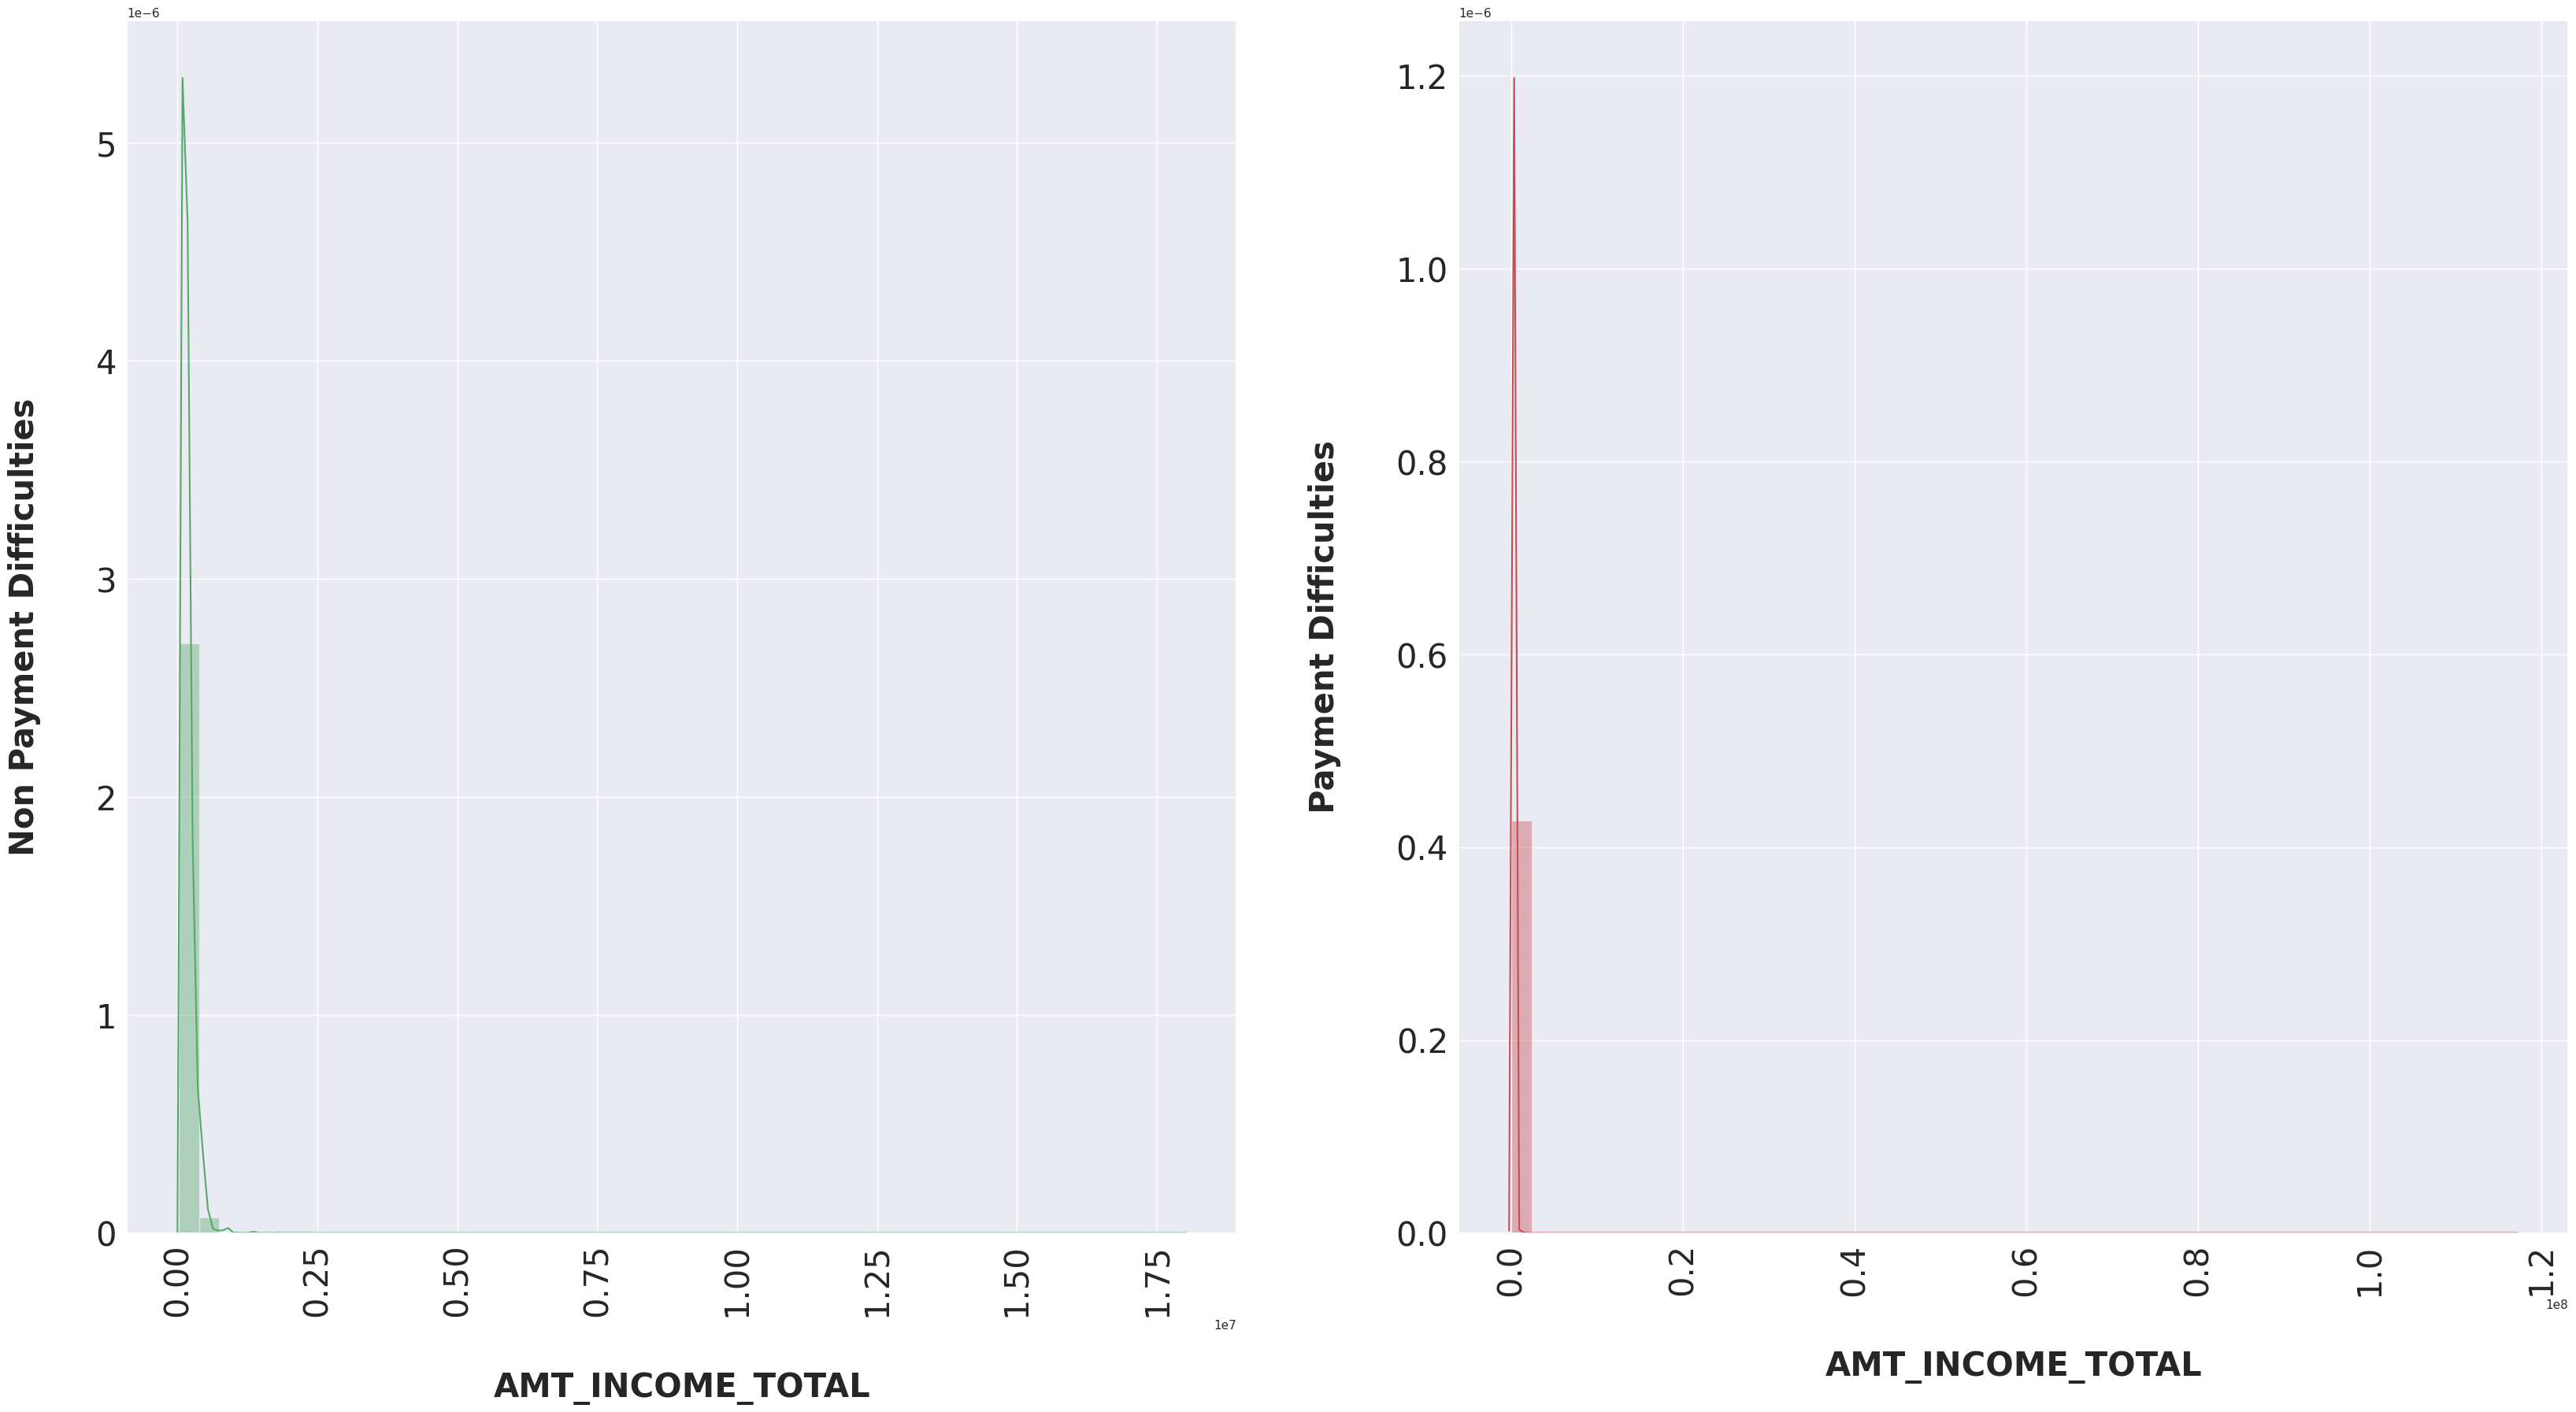

In [55]:
#Total income based on target 0 an target 1
uni(col='AMT_INCOME_TOTAL')

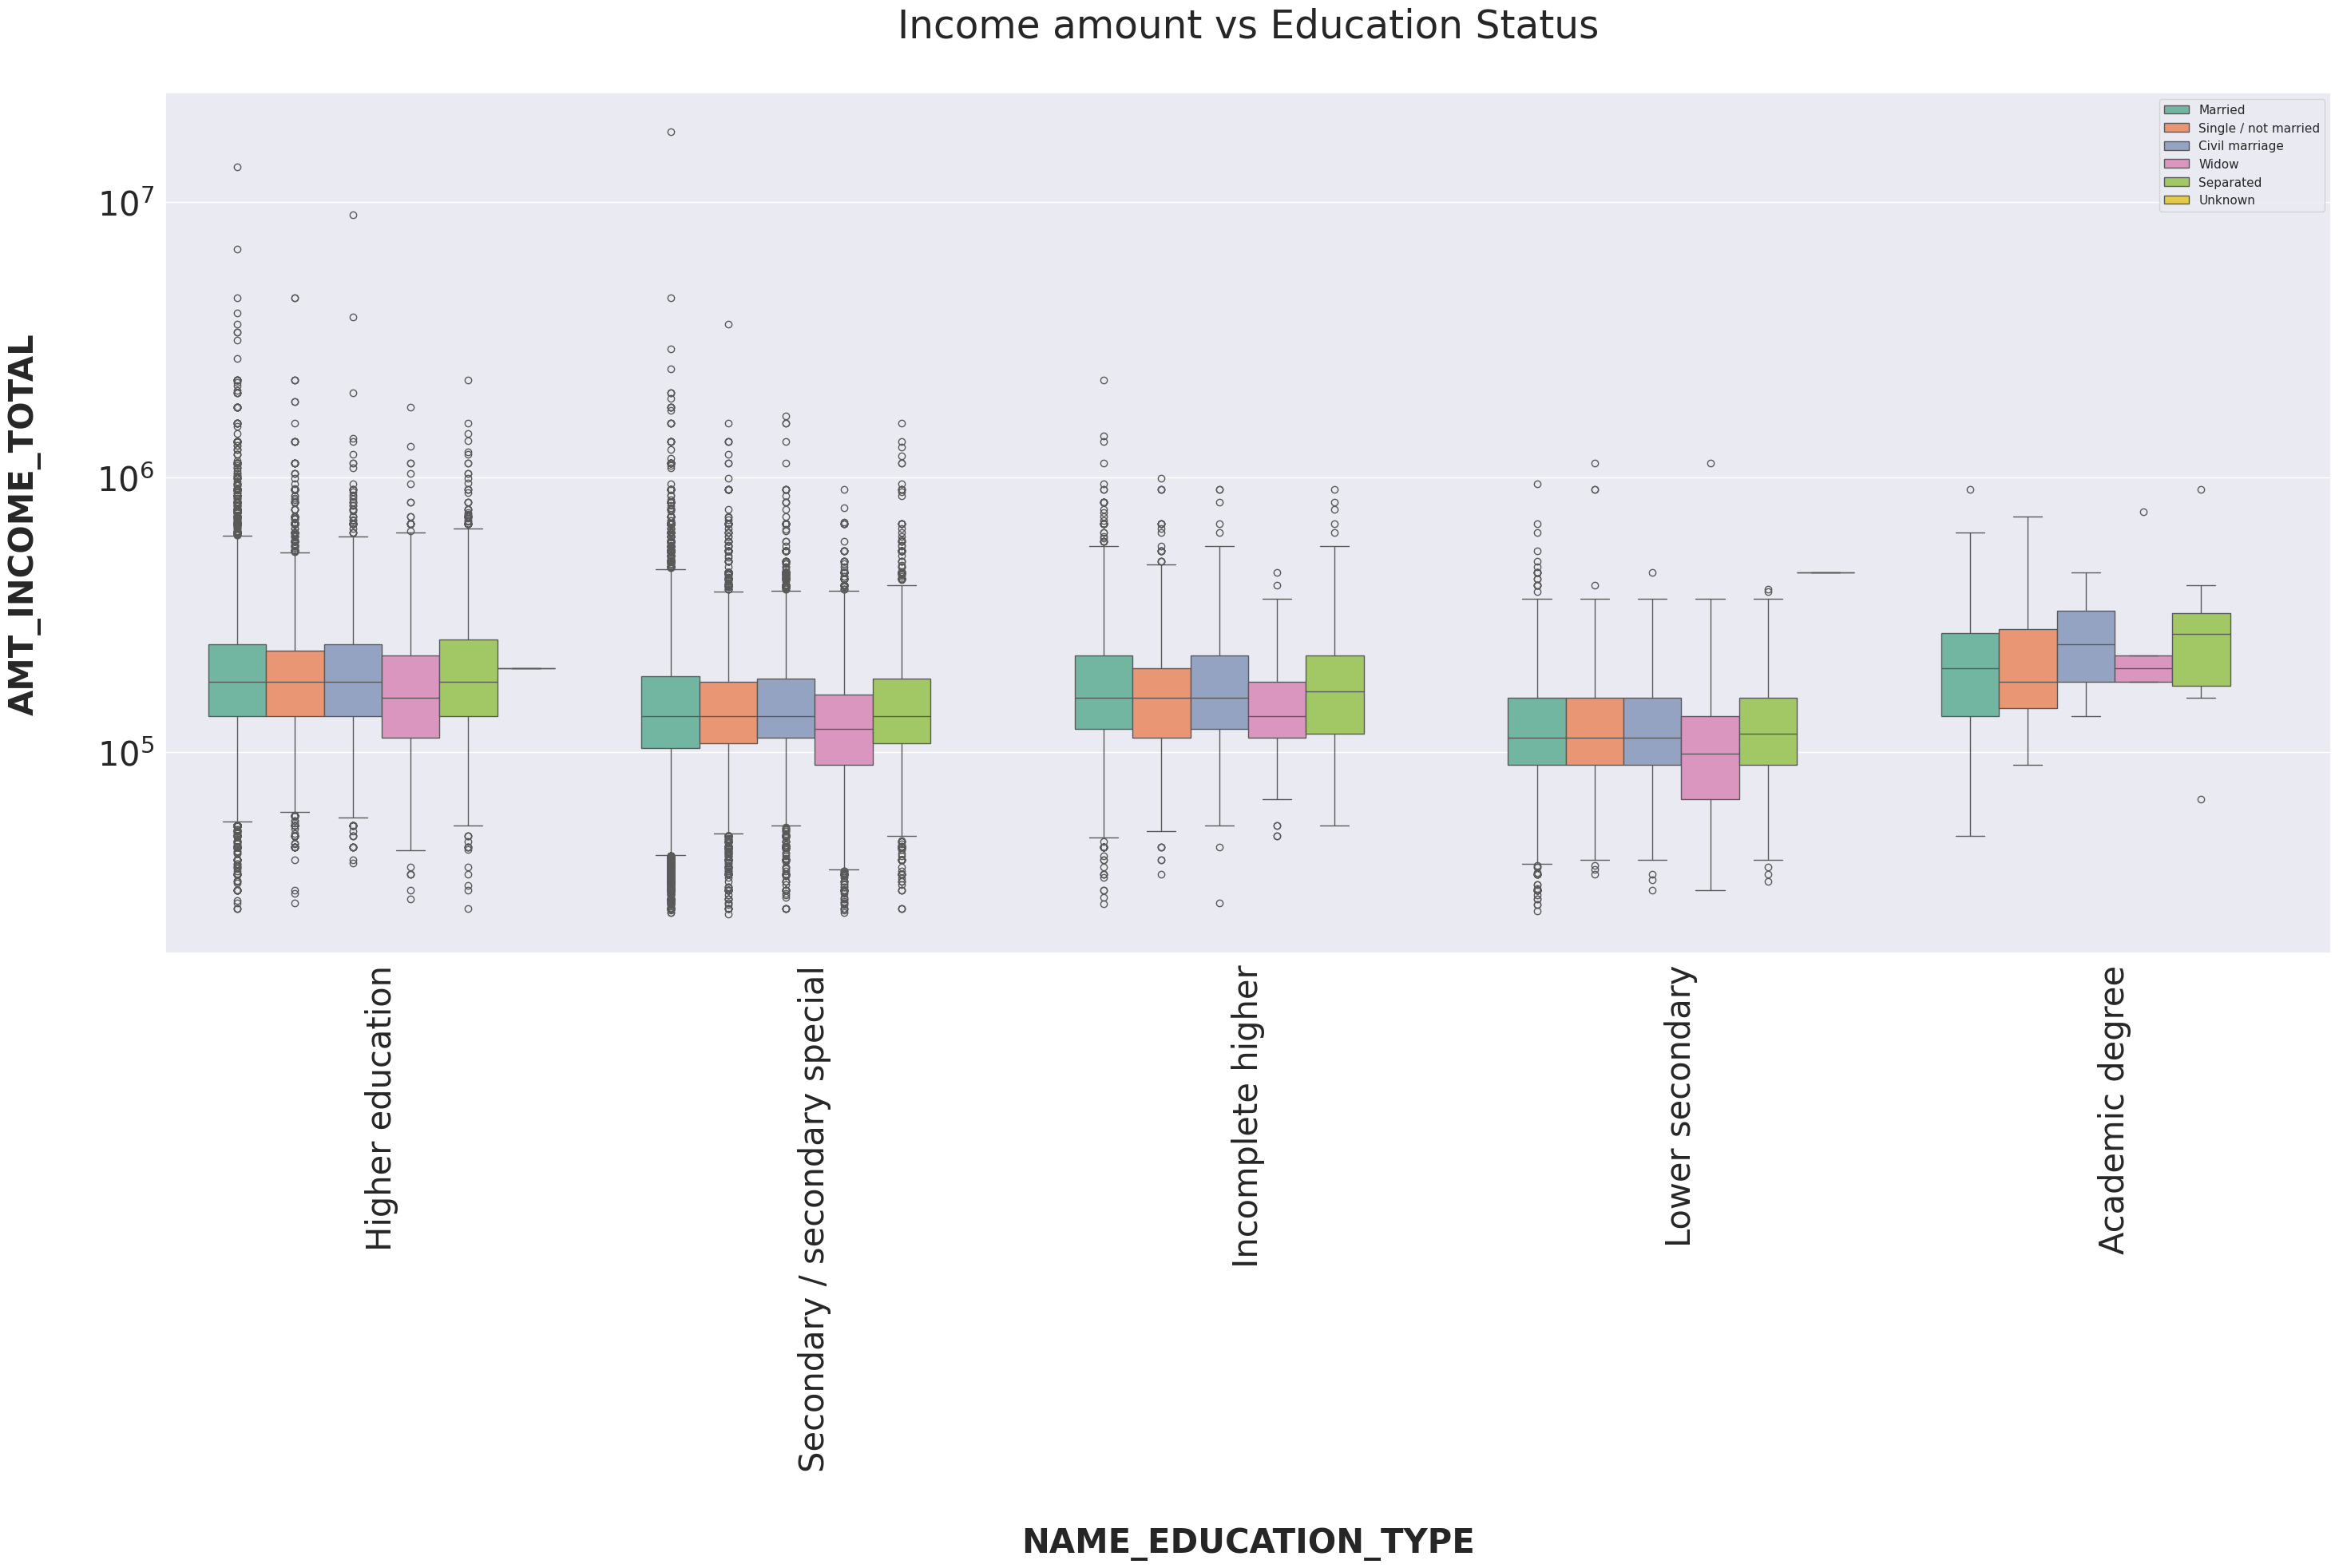

In [56]:
#Bivariate Analysis: Numerical & Categorical W.R.T Target variables

#Income_amount vs Education_status vs Family_status for No-payment difficulties client(Target 0)

plt.figure(figsize=(35,14))
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

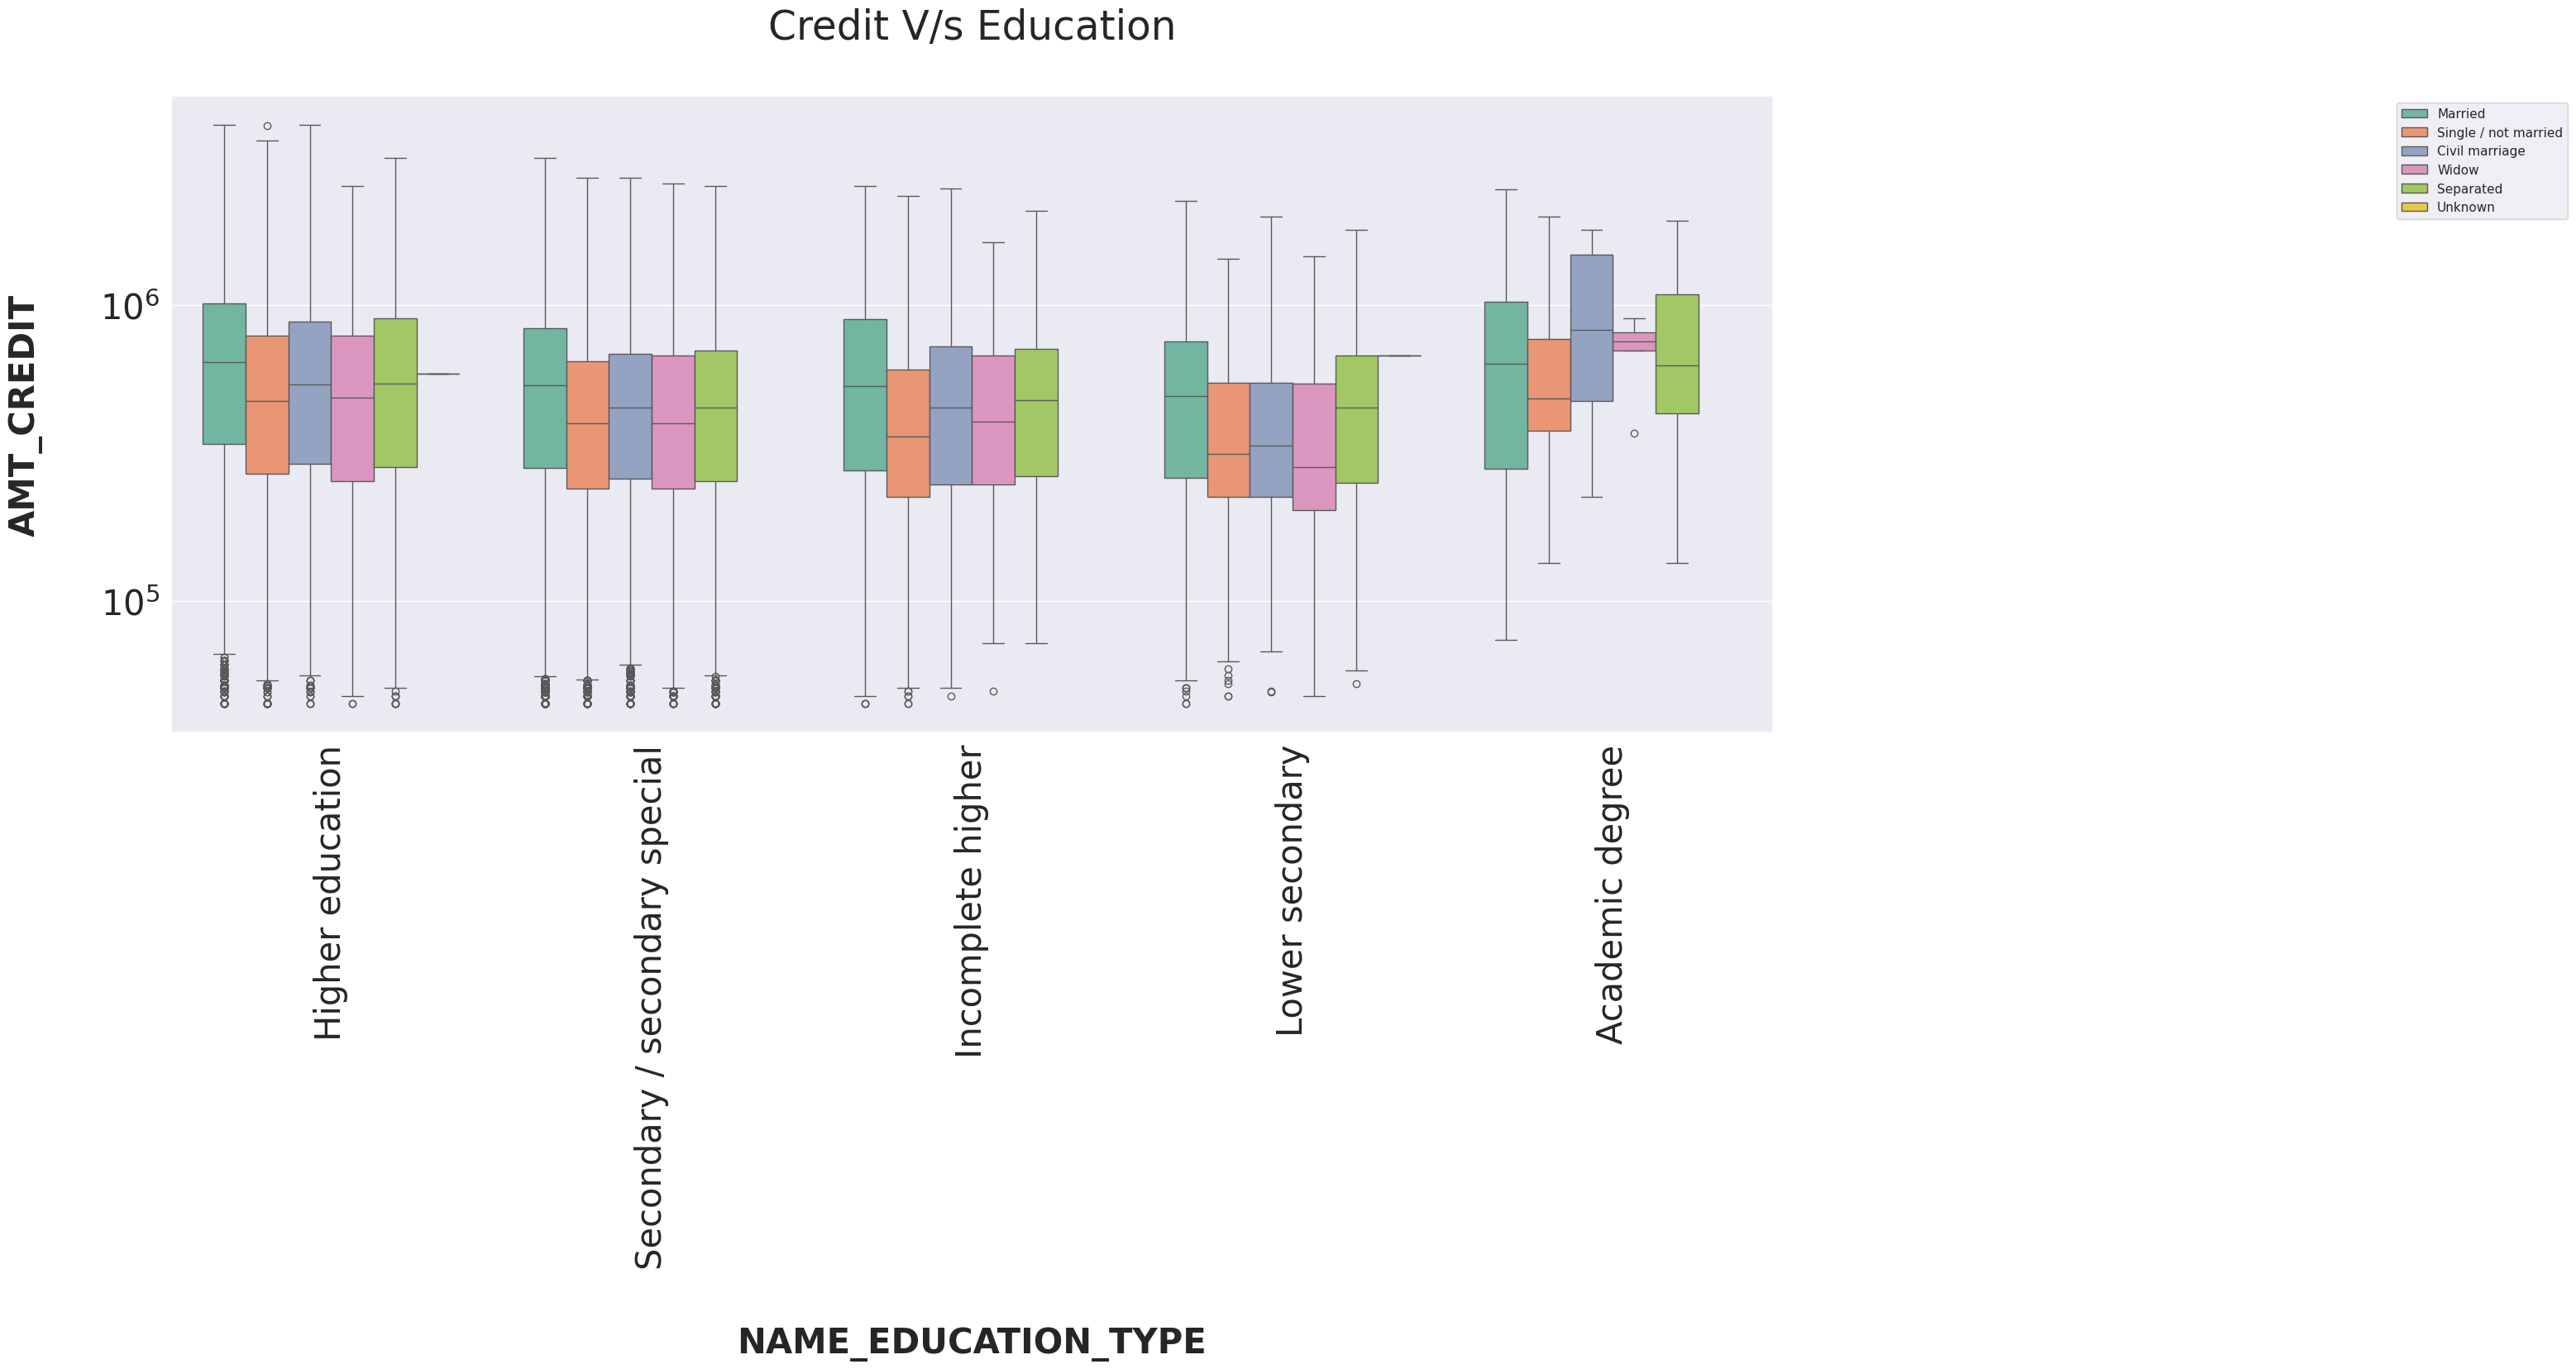

In [57]:
#Credit Amount Vs Education status vs Family_status WRT data Target 0

plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

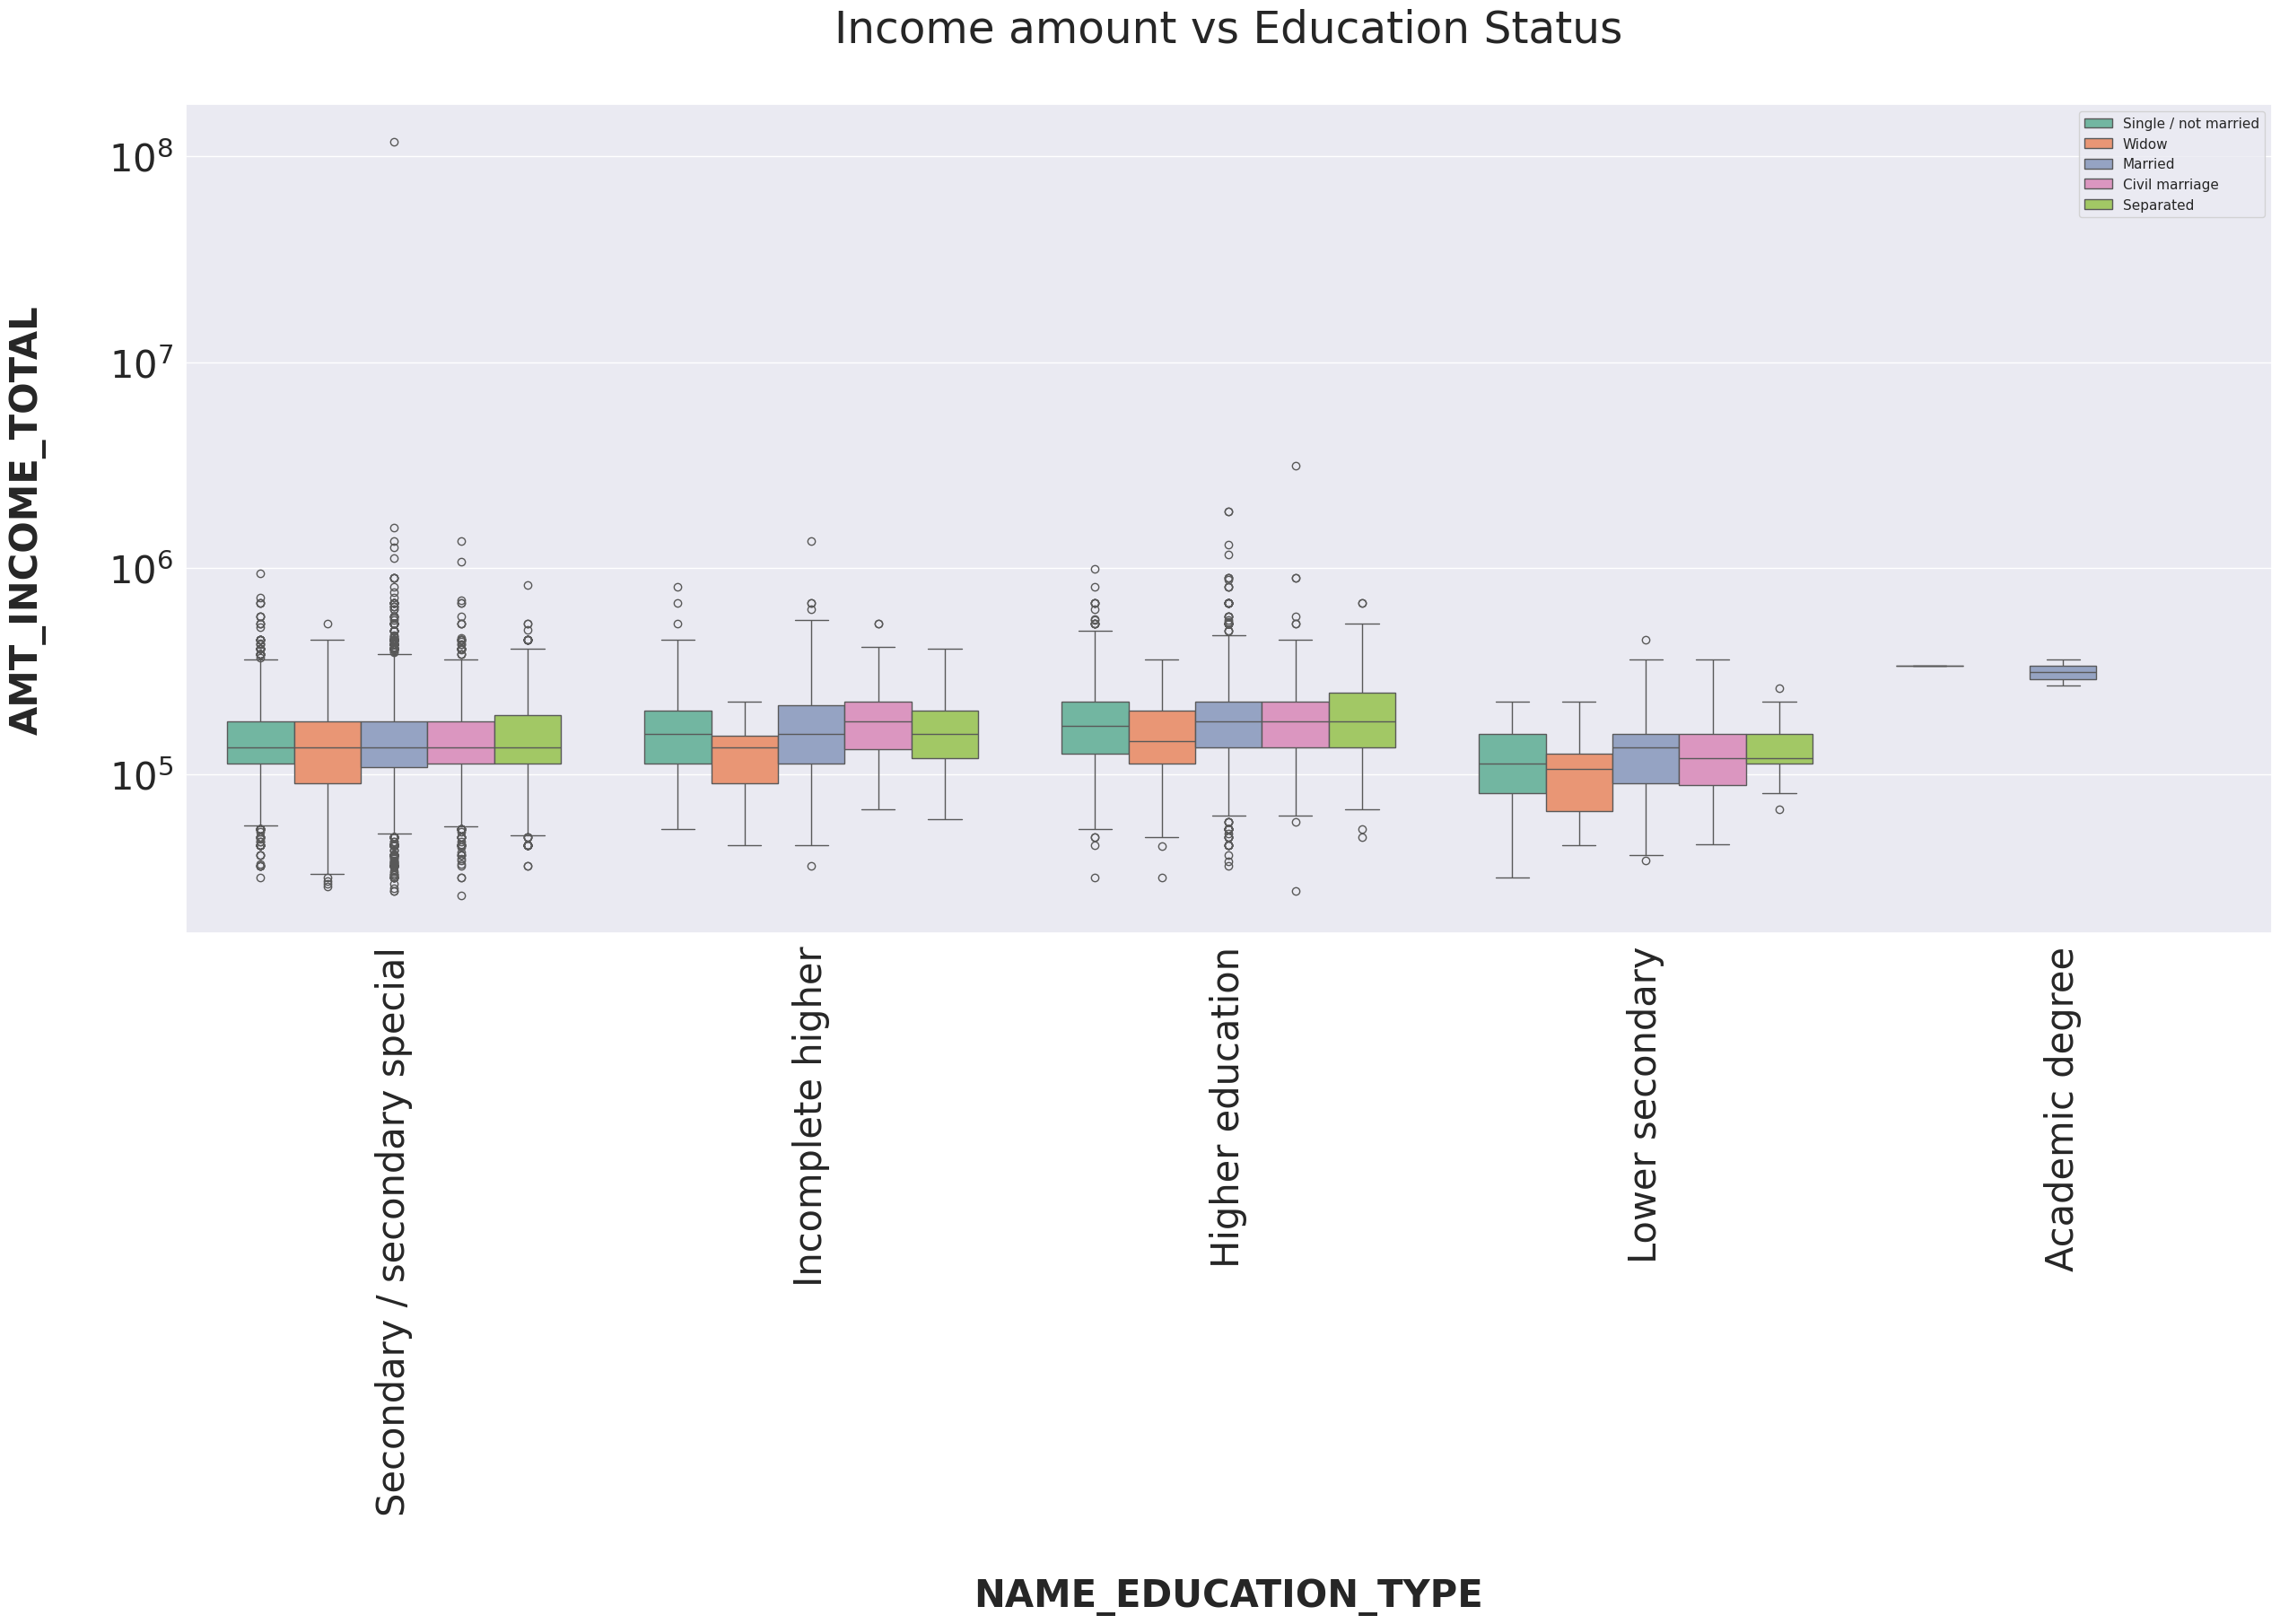

In [58]:
#Income_amount vs Education_status vs Family_status for payment difficulties client(Target 1)

plt.figure(figsize=(30,12))
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

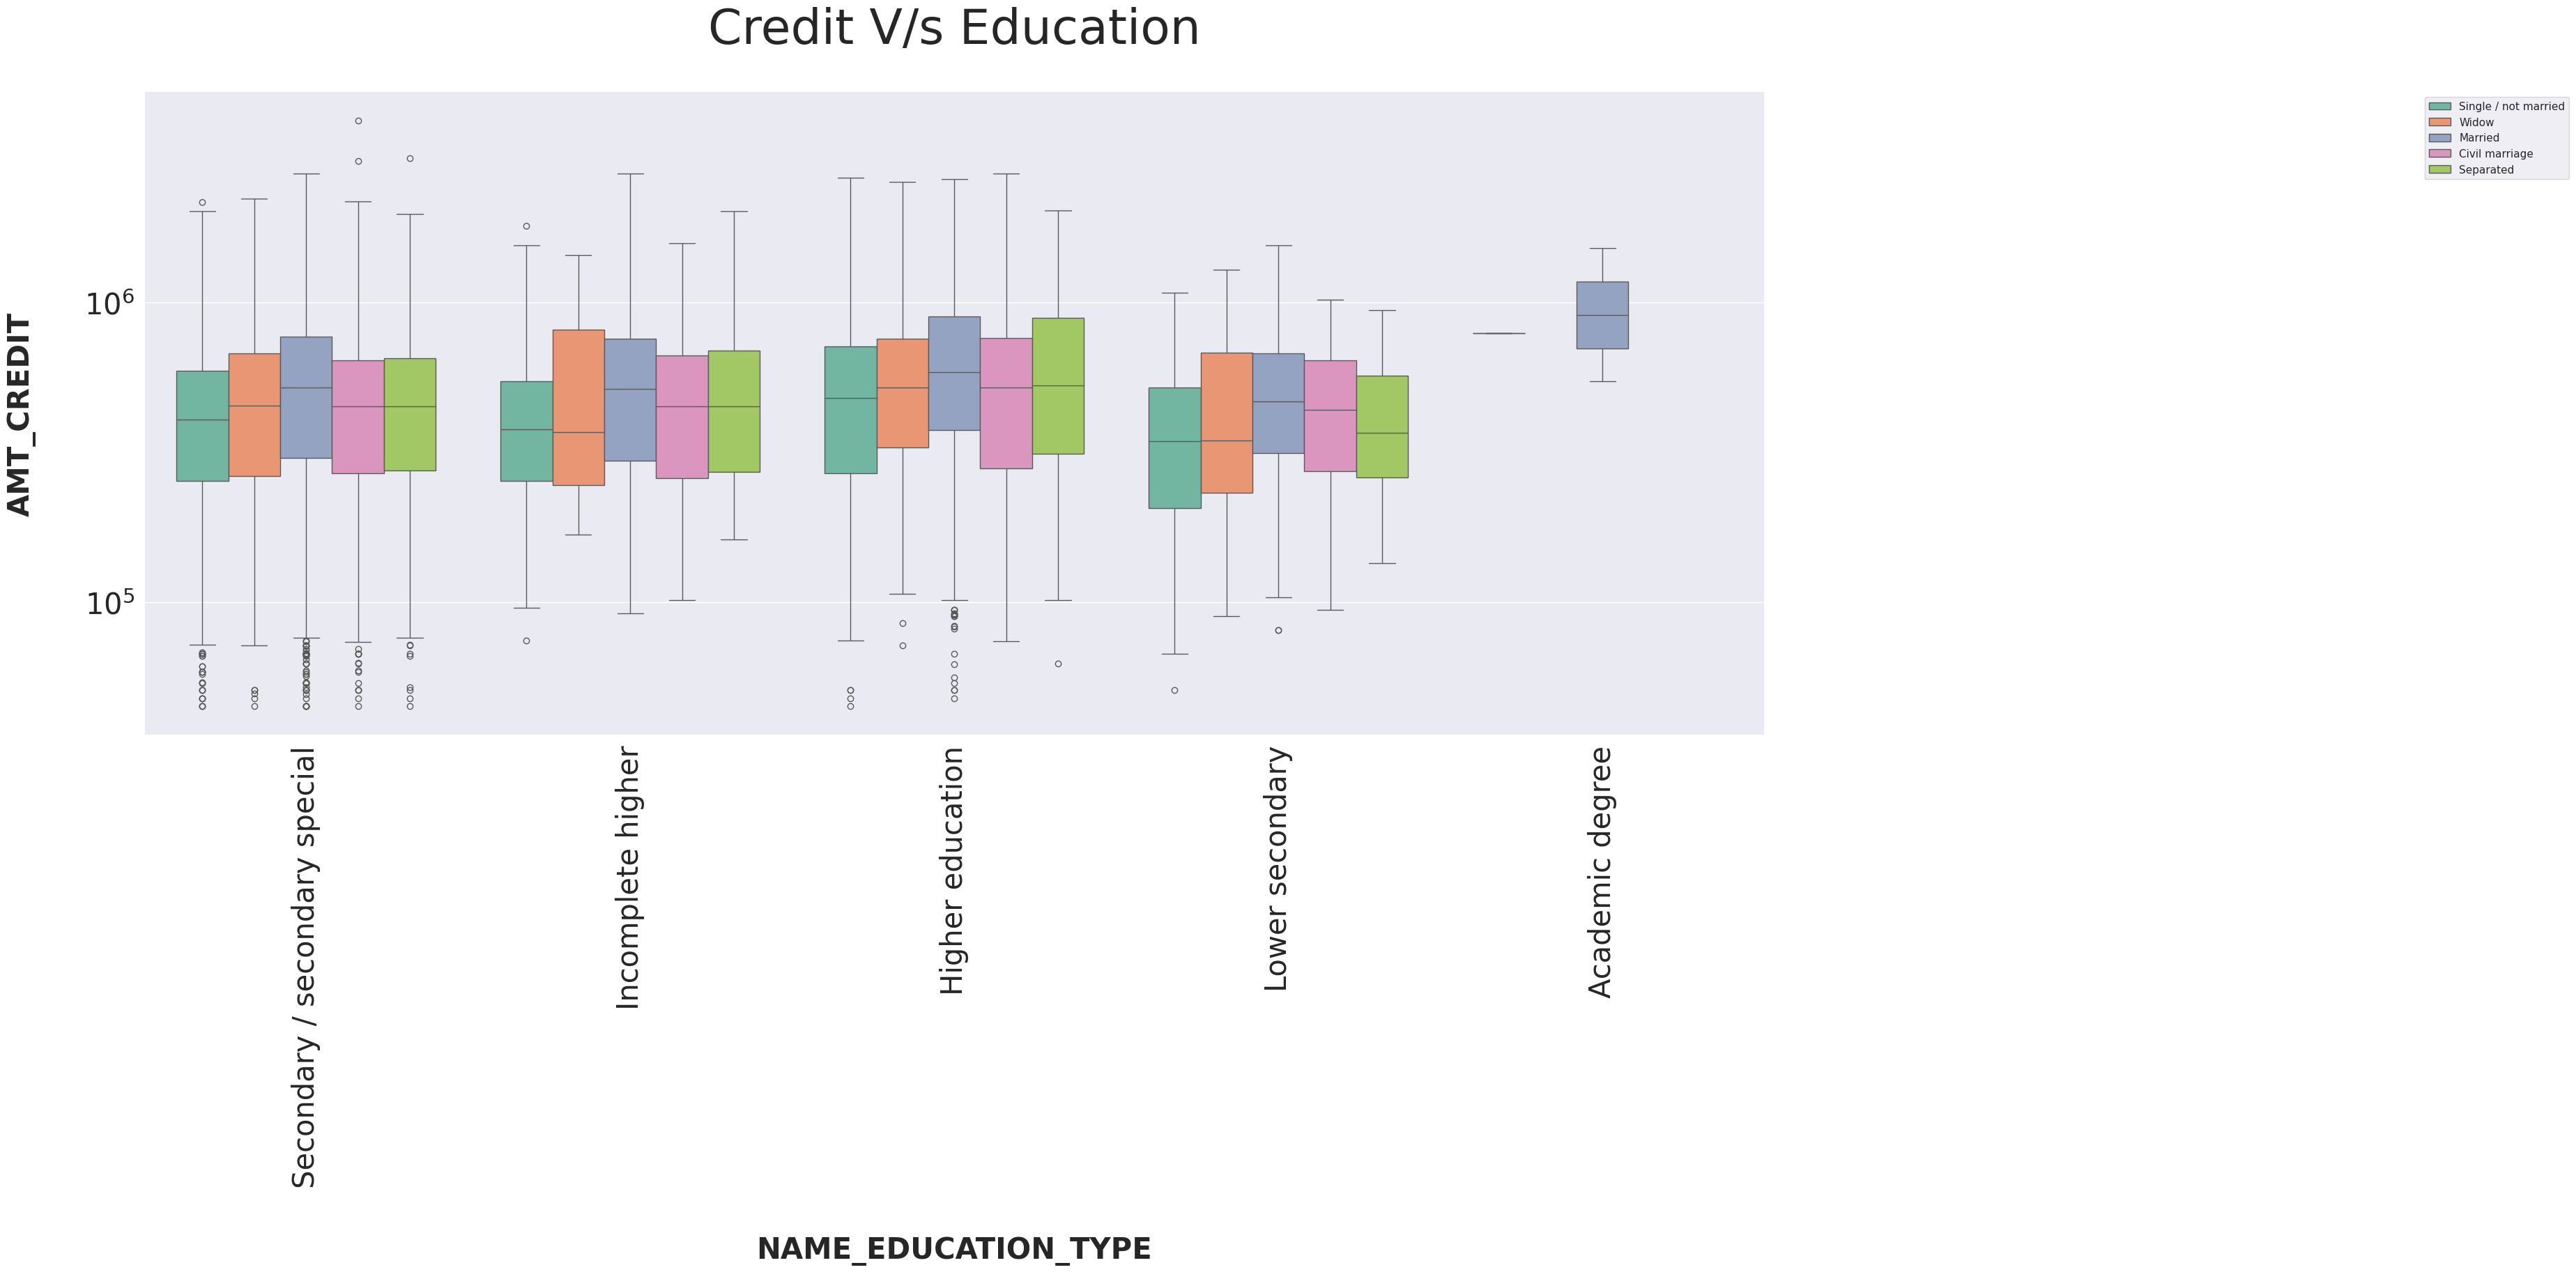

In [59]:
#Credit amout vs education status vs family_status WRT data Target 1

plt.figure(figsize=(30,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')
plt.xticks(rotation = 90)

sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')

plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()